In [89]:
!pip install catboost

     -------------------------------------- 101.2/101.2 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB 2.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('train_gen1.csv')
df_variants = pd.read_csv('variants.csv')

In [5]:
df_train.head()

,Timesteps,ChassisId_encoded,gen,risk_level,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__28,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__3,af2__4,af2__5,af2__6,af2__7,af2__8,af2__9,af2__10,af2__11,af2__12,af2__13,af2__14,af2__15,af2__16,af2__17,af2__18,af2__19,af2__20,af2__21,af2__22,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__22,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__51,f__52,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__65,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__117,f__118,f__119,f__120,f__121,f__122,f__123,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__133,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242
0,0.0,4953.0,gen1,High,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.019177,0.000000,0.000000,0.0,0.0,0.000004,0.000000,0.0,0.023094,0.026157,0.000004,0.0,6.892982e-07,0.028632,0.033713,0.022096,0.0,0.0,0.0,0.038229,0.0,0.000366,0.014890,0.000444,0.003744,0.006856,0.000019,0.561471,-1.552756,-0.386103,-0.911623,-0.365591,-1.463883,-1.405994,-0.950673,-1.459969,-1.488525,-1.495310,-0.043216,-0.436922,-1.806542,-0.025857,-1.549624,1.211372,0.435503,-0.133547,3.100768,-0.783824,-0.024375,-0.009128,-0.098711,-1.537329,-1.615696,-1.530191,0.913915,-0.454961,-0.447804,-1.163520,-0.437762,4.332214,-0.454998,-0.032914,-0.153985,-1.463788,-1.646639,-1.202256,-0.081243,-1.570764,1.887233,2.598457,-0.230614,2.648701,3.518540,0.824347,-0.760278,-0.745245,-1.561368,-0.792724,NaN,NaN,-1.323085,-1.504441,-0.402366,-1.121054,-1.434263,-0.102419,-0.045591,-0.390279,-1.054663,-0.357901,-0.330938,-0.382361,NaN,-0.023751,-0.103866,-1.671371,-1.091107,-0.013858,-0.233692,-0.324953,-1.858123,-0.007901,-0.725647,-1.395858,-0.596999,-0.063575,-0.003888,-1.497055,-0.116974,-0.120877,-0.0624,-0.016227,-0.115113,0.000275,-0.000833,-0.283829,-0.011293,0.095557,0.001247,-0.003534,0.001488,-0.029981,0.000185,-0.025475,0.000037,-1.569819,-1.461116,-0.032288,0.000227,-0.927199,-0.445917,-0.445941,3.180710,-4.63176,-0.304003,-0.00841,1.803974,-0.310739,-0.819451,-0.750954,0.133338,-0.730397,-0.388897,-0.184229,NaN,-0.546605,NaN,-0.820128,0.158042,-0.765970,NaN,-0.249301,-0.720192,-0.579437,-0.789166,-0.762444,-0.442355,-1.473823,-0.080742,-0.548259,NaN,-0.891412,2.645357,-1.931019,-0.689770,-0.178633,-0.724770,-1.735038,-0.271374,-3.662611,

In [6]:
df_train = df_train.drop(['af2__5', 'af2__6', 'af2__13', 'af2__19', 'af2__20', 'af2__22'],axis=1)
df_train.shape

(157437, 302)

In [7]:
zero_counts = df_train.apply(lambda col: (col == 0).sum())
zero_counts

Timesteps              3927
ChassisId_encoded         0
gen                       0
risk_level                0
af1__0                11236
af1__1                11422
af1__2                11236
af1__3               125773
af1__4                11236
af1__5                11236
af1__6                11236
af1__7                11236
af1__8                11236
af1__9                11236
af1__10               11236
af1__11               12399
af1__12               11236
af1__13               11236
af1__14               19167
af1__15               45848
af1__16               11249
af1__17               41784
af1__18               11249
af1__19               11236
af1__20               11236
af1__21               11530
af1__22               11236
af1__23               11236
af1__24               11341
af1__25               11714
af1__26               11236
af1__27               11236
af1__28              155126
af1__29               20249
af1__30               11236
af1__31             

In [8]:
df_train = df_train.drop(['af2__18', 'af2__9', 'af1__28', 'af2__3'], axis=1)

In [9]:
rul = pd.DataFrame(df_train.groupby('ChassisId_encoded')['Timesteps'].max()).reset_index()
rul.columns = ['ChassisId_encoded', 'max']
df_train = df_train.merge(rul, on=['ChassisId_encoded'], how='left')
df_train['RUL'] = df_train['max'] - df_train['Timesteps']

In [10]:
df_train = df_train.drop('max',axis=1)

In [11]:
df_train = df_train.drop('gen',axis=1)

In [12]:
df_train.shape

(157437, 298)

In [13]:
one_hot_encoded_df = pd.get_dummies(df_train['risk_level'], prefix='risk_level')
df_train = df_train.drop('risk_level', axis=1).join(one_hot_encoded_df)

In [14]:
df_train.head()

,Timesteps,ChassisId_encoded,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__22,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__51,f__52,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__65,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__117,f__118,f__119,f__120,f__121,f__122,f__123,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__133,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL,risk_level_High,risk_level_Low,risk_level_Medium
0,0.0,4953.0,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019177,0.000000,0.000004,0.000000,0.023094,0.026157,0.000004,6.892982e-07,0.028632,0.033713,0.022096,0.038229,0.000366,0.014890,0.000444,0.003744,0.006856,0.000019,0.561471,-1.552756,-0.386103,-0.911623,-0.365591,-1.463883,-1.405994,-0.950673,-1.459969,-1.488525,-1.495310,-0.043216,-0.436922,-1.806542,-0.025857,-1.549624,1.211372,0.435503,-0.133547,3.100768,-0.783824,-0.024375,-0.009128,-0.098711,-1.537329,-1.615696,-1.530191,0.913915,-0.454961,-0.447804,-1.163520,-0.437762,4.332214,-0.454998,-0.032914,-0.153985,-1.463788,-1.646639,-1.202256,-0.081243,-1.570764,1.887233,2.598457,-0.230614,2.648701,3.518540,0.824347,-0.760278,-0.745245,-1.561368,-0.792724,NaN,NaN,-1.323085,-1.504441,-0.402366,-1.121054,-1.434263,-0.102419,-0.045591,-0.390279,-1.054663,-0.357901,-0.330938,-0.382361,NaN,-0.023751,-0.103866,-1.671371,-1.091107,-0.013858,-0.233692,-0.324953,-1.858123,-0.007901,-0.725647,-1.395858,-0.596999,-0.063575,-0.003888,-1.497055,-0.116974,-0.120877,-0.0624,-0.016227,-0.115113,0.000275,-0.000833,-0.283829,-0.011293,0.095557,0.001247,-0.003534,0.001488,-0.029981,0.000185,-0.025475,0.000037,-1.569819,-1.461116,-0.032288,0.000227,-0.927199,-0.445917,-0.445941,3.180710,-4.63176,-0.304003,-0.00841,1.803974,-0.310739,-0.819451,-0.750954,0.133338,-0.730397,-0.388897,-0.184229,NaN,-0.546605,NaN,-0.820128,0.158042,-0.765970,NaN,-0.249301,-0.720192,-0.579437,-0.789166,-0.762444,-0.442355,-1.473823,-0.080742,-0.548259,NaN,-0.891412,2.645357,-1.931019,-0.689770,-0.178633,-0.724770,-1.735038,-0.271374,-3.662611,0.045366,-0.860171,-1.096199,-0.174016,-0.197395,-0.238128,-0.740753,-0.793164,-0.18586,-1.75

In [15]:
df_train['RUL'].value_counts()

0.0     7280
1.0     7260
2.0     7247
3.0     7218
4.0     7198
5.0     6977
6.0     6813
7.0     6633
8.0     6459
9.0     6342
10.0    6207
11.0    6000
12.0    5825
13.0    5609
14.0    5425
15.0    5220
16.0    5056
17.0    4958
18.0    4856
19.0    4699
20.0    4536
21.0    4356
22.0    4196
23.0    4018
24.0    3816
25.0    3593
26.0    3420
27.0    3203
28.0    3004
29.0       3
33.0       2
32.0       2
31.0       2
30.0       2
35.0       1
34.0       1
Name: RUL, dtype: int64

In [16]:
df_train[df_train['RUL'] >= 29][['ChassisId_encoded','RUL']]

,ChassisId_encoded,RUL
43827,48411.0,29.0
45880,49837.0,33.0
45881,49837.0,32.0
45882,49837.0,31.0
45883,49837.0,30.0
45884,49837.0,29.0
53784,53239.0,35.0
53785,53239.0,34.0
53786,53239.0,33.0
53787,53239.0,32.0


In [17]:
from tqdm import tqdm

X = df_train.iloc[:,2:-3]

float_cols = []
int_cols = []

for col in tqdm(X.columns):
    try:
        X[col] = pd.to_numeric(X[col])
        if (X[col] % 1 > 0).any():
            float_cols.append(col)
        else:
            int_cols.append(col)
    except:
        object_cols.append(col)
        
print("Continuous Variables")
print(float_cols)

print("Discrete Variables")
print(int_cols)

100%|████████████████████████████████████████████████████████████████████████████████| 295/295 [00:49<00:00,  6.01it/s]

Continuous Variables
['af1__0', 'af1__1', 'af1__2', 'af1__3', 'af1__4', 'af1__5', 'af1__6', 'af1__7', 'af1__8', 'af1__9', 'af1__10', 'af1__11', 'af1__12', 'af1__13', 'af1__14', 'af1__15', 'af1__16', 'af1__17', 'af1__18', 'af1__19', 'af1__20', 'af1__21', 'af1__22', 'af1__23', 'af1__24', 'af1__25', 'af1__26', 'af1__27', 'af1__29', 'af1__30', 'af1__31', 'af2__0', 'af2__1', 'af2__2', 'af2__4', 'af2__7', 'af2__8', 'af2__10', 'af2__11', 'af2__12', 'af2__14', 'af2__15', 'af2__16', 'af2__17', 'af2__21', 'af2__23', 'af2__24', 'af2__25', 'af2__26', 'af2__27', 'af2__28', 'f__0', 'f__1', 'f__2', 'f__3', 'f__4', 'f__5', 'f__6', 'f__7', 'f__8', 'f__9', 'f__10', 'f__11', 'f__12', 'f__13', 'f__14', 'f__15', 'f__16', 'f__17', 'f__18', 'f__19', 'f__20', 'f__21', 'f__22', 'f__23', 'f__24', 'f__25', 'f__26', 'f__27', 'f__28', 'f__29', 'f__30', 'f__31', 'f__32', 'f__33', 'f__34', 'f__35', 'f__36', 'f__37', 'f__38', 'f__39', 'f__40', 'f__41', 'f__42', 'f__43', 'f__44', 'f__45', 'f__46', 'f__47', 'f__48', 'f

In [18]:
cont_col_df = X[float_cols]
dis_col_df = X[int_cols]

In [19]:
def vc(df, column, r=False):
    vc_df = df.reset_index().groupby([column]).size().to_frame('count')
    vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
    vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
    print(f'STATUS: Value counts of "{column}"...')
    display(vc_df)
    if r:
        return vc_df

In [20]:
def extract_skewness(X):
    skewness = X.skew(axis = 0, skipna = True).values
    cols = X.skew(axis = 0, skipna = True).index
    skewdf = pd.DataFrame({'skew value':skewness}, index = cols)
    skewdf['left or right'] = np.nan
    skewdf['left or right'] = skewdf.apply(lambda x: 'left skewed' if x['skew value']>0.5 else x['left or right'], axis=1)
    skewdf['left or right'] = skewdf.apply(lambda x: 'right skewed' if x['skew value']<-0.5 else x['left or right'], axis=1)
    skewdf['left or right'] = skewdf.apply(lambda x: 'normal' if (x['skew value']<=0.5 and x['skew value']>=-0.5)  else x['left or right'], axis=1)
    return skewdf, vc(skewdf, 'left or right')

skewdf = extract_skewness(X)

STATUS: Value counts of "left or right"...


,count,percentage (%)
left or right,,
left skewed,239,82.986111
right skewed,40,13.888889
normal,9,3.125000


In [21]:
skewdf[0][(skewdf[0]['left or right']=='right skewed') & (skewdf[0]['skew value']<=-100)]

,skew value,left or right
f__16,-148.129772,right skewed
f__27,-172.663105,right skewed
f__70,-225.296774,right skewed
f__79,-191.019896,right skewed
f__90,-175.929199,right skewed
f__91,-239.331733,right skewed
f__95,-162.933141,right skewed
f__97,-133.385222,right skewed
f__101,-195.540974,right skewed


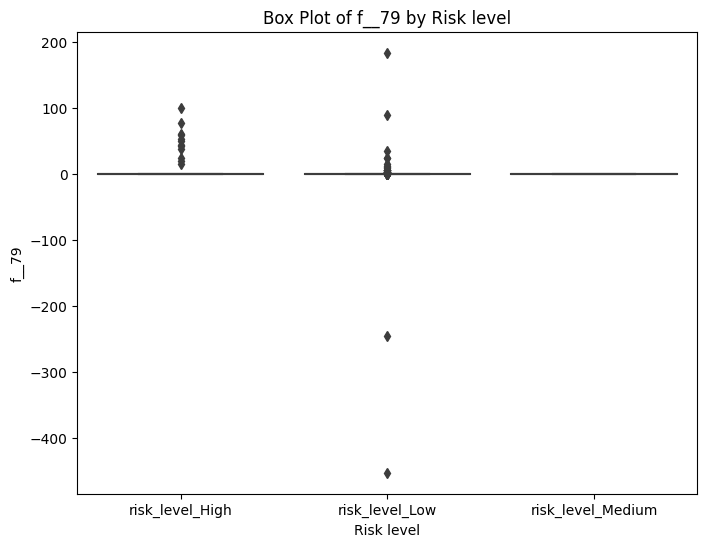

In [22]:
df_melted = pd.DataFrame()
df_melted = df_train.melt(id_vars='f__79', value_vars=['risk_level_High', 'risk_level_Low', 'risk_level_Medium'],
                    var_name='risk_level', value_name='Value')

df_melted = df_melted[df_melted['Value'] == 1]

df_melted = df_melted.drop(columns='Value')

plt.figure(figsize=(8, 6))
sns.boxplot(x='risk_level', y='f__79', data=df_melted)
plt.title('Box Plot of f__79 by Risk level')
plt.xlabel('Risk level')
plt.ylabel('f__79')
plt.show()

In [23]:
X[(X['f__79']<=-5) | (X['f__79']>5)]

,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__22,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__51,f__52,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__65,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__117,f__118,f__119,f__120,f__121,f__122,f__123,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__133,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL
13456,0.000198,1.281118e-05,0.044815,0.000000e+00,0.026820,0.025840,0.008442,0.000070,0.000772,0.192382,0.049146,1.433419e-06,0.002765,0.001024,1.370375e-06,2.322670e-08,2.170369e-05,0.000000e+00,1.783810e-05,0.089926,0.003067,3.095787e-06,0.084025,0.000156,1.350798e-05,2.959745e-06,0.011776,0.000042,7.930258e-07,0.191840,1.330558e-06,0.0,0.000000e+00,0.006984,4.278526e-04,1.618071e-08,0.0,0.000000,0.017611,0.000000e+00,1.217703e-03,0.009944,0.005075,3.860153e-02,0.005496,1.525610e-08,0.007034,6.889679e-03,9.597472e-07,2.206114e-03,4.160754e-09,-0.366845,-0.414875,-0.078479,0.388445,-0.112686,-0.588733,-0.526774,-0.160226,-0.632762,-0.580219,-0.574168,-0.031574,-0.042829,-0.352784,-0.025857,-0.422470,0.243062,-0.104709,-0.133547,0.137454,-0.659243,-0.024375,-0.009128,-0.098711,-0.569079,-0.483334,-0.499542,-0.087614,0.816743,-0.192593,-0.364401,-0.142203,-0.351088,-0.189860,-0.032914,-0.153985,-0.635700,-0.688478,-0.625357,-0.081243,-0.461458,0.047904,0.337991,-0.230614,0.135514,-0.010253,0.080965,-0.203994,0.023981,0.701877,0.229677,NaN,NaN,-0.440362,-0.047255,1.688599,-0.236168,-0.256696,-0.102419,-0.045591,-0.387973,-0.491917,-0.356657,-0.329472,-0.380271,NaN,-0.023751,0.065559,0.723157,-0.197953,-0.002136,-0.233692,0.019532,0.489413,-0.004476,-0.416020,-0.245753,-0.128007,-0.063575,5.915961,0.518556,-0.116974,0.037391,-0.062400,-0.016227,-0.115113,-0.003075,-0.000891,-0.283829,-0.011293,-0.055964,0.000773,-0.003313,0.001479,-0.014450,-0.000033,-0.013963,-0.000326,-0.513836,-0.097842,-0.018303,-0.000418,0.049263,0.229454,0.229293,-0.530978,0.617950,0.686244,-0.00841,-0.010445,-0.310739,0.763944,0.836613,-0.348107,0.368802,0.014038,-0.184229,NaN,-0.546524,NaN,0.773735,-0.410538,0.240515,NaN,0.193205,-0.315625,0.190672,0.265180,0.761462,0.234900,0.140421,-0.073005,0.170035,NaN,0.271173,0.311162,-0.052333,-0.303571,1.212526,-0.309974,0.238776,5.462851,0.780461,-0.654273,-0.994351,-1.095890,-0.207551,-0.197395,-0.256752,-0.438264,-0.459292,1.030026,0.238027,0.778880,5.503477,-0.

In [24]:
chassis_id_set_1 = []
for col in skewdf[0][(skewdf[0]['left or right']=='right skewed') & (skewdf[0]['skew value']<=-100)].index:
    chassis_id_set_1.extend(list(set(df_train[(df_train[col] <= -100) | (df_train[col] > 100)]['ChassisId_encoded'])))

In [25]:
skewdf[0][(skewdf[0]['left or right']=='left skewed') & (skewdf[0]['skew value']>=100)]

,skew value,left or right
f__67,146.431487,left skewed
f__84,109.008258,left skewed
f__89,242.368431,left skewed
f__92,290.731041,left skewed
f__93,377.008866,left skewed
f__108,110.098213,left skewed
f__193,123.355618,left skewed
f__196,167.163355,left skewed
f__197,153.928408,left skewed
f__198,167.576275,left skewed


In [26]:
chassis_id_set_2 = []
for col in skewdf[0][(skewdf[0]['left or right']=='left skewed') & (skewdf[0]['skew value']>=100)].index:
    chassis_id_set_2.extend(list(set(df_train[(df_train[col] <= -100) | (df_train[col] > 100)]['ChassisId_encoded'])))

In [27]:
set(chassis_id_set_1 + chassis_id_set_2)

{6118.0, 6920.0, 26947.0, 53239.0, 60983.0, 65901.0, 66763.0, 85866.0, 86693.0}

In [28]:
chassis_id_set = set(chassis_id_set_1 + chassis_id_set_2)

In [29]:
chassis_id_set

{6118.0, 6920.0, 26947.0, 53239.0, 60983.0, 65901.0, 66763.0, 85866.0, 86693.0}

In [30]:
df_train[df_train['f__79']>100]['ChassisId_encoded']

53818    53239.0
98111    66763.0
Name: ChassisId_encoded, dtype: float64

In [31]:
df_train[df_train['ChassisId_encoded'] == 85866.0][skewdf[0][(skewdf[0]['skew value']<=-100) | (skewdf[0]['skew value']>=100)].index].min()

f__16      -0.568870
f__27      -0.217372
f__67      -0.103866
f__70      -0.017788
f__79    -452.049822
f__84      -0.016227
f__89      -0.011293
f__90      -0.111614
f__91       0.001247
f__92      -0.003534
f__93       0.001488
f__95      -0.000487
f__97       0.000027
f__101      0.000227
f__108     -0.008410
f__193     -0.003968
f__196     -0.004218
f__197     -0.004661
f__198     -0.004332
f__199     -0.004663
f__200     -0.003842
f__201     -0.004576
f__202     -0.003924
f__203     -0.004515
f__204     -0.005344
f__205     -0.004090
f__206     -0.010929
f__207     -0.004603
f__208     -0.005808
f__209     -0.003499
f__210     -0.008689
f__211     -0.004351
f__213     -0.009879
f__214     -0.010231
f__215     -0.009932
dtype: float64

In [32]:
df_train[df_train['ChassisId_encoded'] == 85866.0].describe()

,Timesteps,ChassisId_encoded,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__22,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__51,f__52,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__65,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__117,f__118,f__119,f__120,f__121,f__122,f__123,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__133,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL,risk_level_High,risk_level_Low,risk_level_Medium
count,11.000000,11.0,11.000000,1.100000e+01,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000,1.100000e+01,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000,11.000000,1.100000e+01,11.000000,1.100000e+01,11.0,11.0,11.000000,1.100000e+01,11.0,11.0,11.000000,11.000000,11.0,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,1.100000e+01,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,0.0,0.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,0.0,1.100000e+01,11.000000,1.100000e+01,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.0,11.000000,0.0,11.000000,11.000000,11.000000,0.0,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.0,11.000000,11.000000,11

In [33]:
df_train[df_train['ChassisId_encoded'] == 85866.0]

,Timesteps,ChassisId_encoded,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__22,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__51,f__52,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__65,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__117,f__118,f__119,f__120,f__121,f__122,f__123,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__133,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL,risk_level_High,risk_level_Low,risk_level_Medium
153468,18.0,85866.0,0.000167,2.544982e-06,0.028221,0.0,0.015737,0.015284,0.007900,0.000047,0.000965,0.144528,0.028292,8.427973e-07,0.003099,0.000798,3.616729e-07,1.990860e-08,0.000019,3.119014e-07,0.000009,0.057258,0.003458,1.632505e-06,0.055082,0.000148,0.000006,9.357041e-07,0.008152,0.000035,1.493145e-07,0.141394,7.498905e-07,0.0,0.0,0.006817,0.000000e+00,0.0,0.0,0.000014,0.002991,0.0,0.000000e+00,0.005755,0.011620,0.004278,0.000001,0.000029,0.010370,0.000000e+00,0.002267,0.005846,0.0,-0.396790,-0.927569,-0.023725,-0.911623,-0.365591,-0.757483,-1.109552,0.201012,-0.854369,-1.016363,-0.947241,-0.023425,-0.436922,-0.605408,-0.025857,-0.977759,-0.56887,-0.201751,-0.133547,-1.67642,-0.777891,-0.024375,-0.009128,-0.098711,-0.984329,-0.954297,-0.905700,-0.214826,-0.408426,0.028780,-0.786509,2.814099,-1.150064,-0.038268,-0.032914,-0.153985,-0.959687,0.640163,0.049284,-0.065596,-0.821713,-1.529368,-1.627826,-0.230614,-1.508349,-0.946278,-0.254189,-0.760278,-0.745245,-1.561368,-0.792724,NaN,NaN,-1.323085,-1.504441,-0.402366,-1.121054,-1.434263,-0.102419,-0.045591,-0.390279,-1.054663,-0.357901,-0.330938,-0.382361,NaN,-0.023751,-0.103866,-1.671371,-1.091107,-0.013858,-0.233692,-0.324953,-1.858123,-0.007901,-0.725647,-1.395858,-0.596999,-0.063575,-0.003888,-1.497055,-0.116974,-0.120877,-0.062400,-0.016227,-0.115113,-0.021944,-0.000833,-0.283829,-0.011293,-0.111614,0.001247,-0.003534,0.001488,-0.011185,0.000185,-0.017433,0.000037,-0.956244,-1.461116,-0.008899,0.000227,-1.070170,-0.818535,-0.818484,-0.635554,-0.604133,-0.836075,-0.00841,-0.674380,-0.310739,-0.421730,-0.720289,-0.775095,-1.055072,-0.565375,-0.184229,NaN,1.829638,NaN,-0.434005,-0.578197,-0.778915,NaN,-0.249301,-0.585360,-0.805489,-0.802727,-0.730562,-0.816013,-0.648328,-0.080623,-0.884723,NaN,-0.887361,-0.725654,-0.622655,-0.384426,-0.178633,-0.253859,-0.454108,-0.271374,0.477650,-0.256348,0.433786,-1.096199,-0.205067,-0.197395,-0.250749,-0.402560,-

In [34]:
df_train.isnull().sum()

Timesteps                 0
ChassisId_encoded         0
af1__0                    0
af1__1                    0
af1__2                    0
af1__3                    0
af1__4                    0
af1__5                    0
af1__6                    0
af1__7                    0
af1__8                    0
af1__9                    0
af1__10                   0
af1__11                   0
af1__12                   0
af1__13                   0
af1__14                   0
af1__15                   0
af1__16                   0
af1__17                   0
af1__18                   0
af1__19                   0
af1__20                   0
af1__21                   0
af1__22                   0
af1__23                   0
af1__24                   0
af1__25                   0
af1__26                   0
af1__27                   0
af1__29                   0
af1__30                   0
af1__31                   0
af2__0                    0
af2__1                    0
af2__2              

In [35]:
df_train = df_train.drop(['f__51','f__52','f__65','f__117','f__119','f__123','f__133'],axis=1)
df_train.shape

(157437, 293)

In [36]:
df_train = df_train[df_train['ChassisId_encoded'] != 60983]
df_train = df_train[df_train['ChassisId_encoded'] != 6118]

In [37]:
df_train.at[153478, 'f__79'] = -0.003888

In [38]:
for col in df_train.columns:
    num_unique_col = len(df_train[col].dropna().unique())
    print(f"Number of unique values in {col} is {num_unique_col}")
    display(df_train[col].head())

Number of unique values in Timesteps is 35


0    0.0
1    0.0
2    1.0
3    2.0
4    3.0
Name: Timesteps, dtype: float64

Number of unique values in ChassisId_encoded is 7278


0    4953.0
1    4955.0
2    4955.0
3    4955.0
4    4955.0
Name: ChassisId_encoded, dtype: float64

Number of unique values in af1__0 is 23889


0    0.000000
1    0.000322
2    0.000322
3    0.000322
4    0.000322
Name: af1__0, dtype: float64

Number of unique values in af1__1 is 10267


0    0.00000
1    0.00002
2    0.00002
3    0.00002
4    0.00002
Name: af1__1, dtype: float64

Number of unique values in af1__2 is 25194


0    0.000000
1    0.057749
2    0.057749
3    0.057749
4    0.057749
Name: af1__2, dtype: float64

Number of unique values in af1__3 is 307


0    0.000000e+00
1    8.627059e-08
2    8.627059e-08
3    8.627059e-08
4    8.627059e-08
Name: af1__3, dtype: float64

Number of unique values in af1__4 is 25165


0    0.000000
1    0.029966
2    0.029966
3    0.029966
4    0.029966
Name: af1__4, dtype: float64

Number of unique values in af1__5 is 25179


0    0.000000
1    0.030469
2    0.030469
3    0.030469
4    0.030469
Name: af1__5, dtype: float64

Number of unique values in af1__6 is 25138


0    0.000000
1    0.019837
2    0.019837
3    0.019837
4    0.019837
Name: af1__6, dtype: float64

Number of unique values in af1__7 is 21383


0    0.000000
1    0.000113
2    0.000113
3    0.000113
4    0.000113
Name: af1__7, dtype: float64

Number of unique values in af1__8 is 24749


0    0.000000
1    0.001833
2    0.001833
3    0.001833
4    0.001833
Name: af1__8, dtype: float64

Number of unique values in af1__9 is 25224


0    0.000000
1    0.314115
2    0.314115
3    0.314115
4    0.314115
Name: af1__9, dtype: float64

Number of unique values in af1__10 is 25199


0    0.000000
1    0.061117
2    0.061117
3    0.061117
4    0.061117
Name: af1__10, dtype: float64

Number of unique values in af1__11 is 4742


0    0.000000
1    0.000008
2    0.000008
3    0.000008
4    0.000008
Name: af1__11, dtype: float64

Number of unique values in af1__12 is 25045


0    0.000000
1    0.007396
2    0.007396
3    0.007396
4    0.007396
Name: af1__12, dtype: float64

Number of unique values in af1__13 is 24749


0    0.000000
1    0.001723
2    0.001723
3    0.001723
4    0.001723
Name: af1__13, dtype: float64

Number of unique values in af1__14 is 2588


0    0.000000
1    0.000003
2    0.000003
3    0.000003
4    0.000003
Name: af1__14, dtype: float64

Number of unique values in af1__15 is 1333


0    0.000000
1    0.000001
2    0.000001
3    0.000001
4    0.000001
Name: af1__15, dtype: float64

Number of unique values in af1__16 is 16643


0    0.000000
1    0.000049
2    0.000049
3    0.000049
4    0.000049
Name: af1__16, dtype: float64

Number of unique values in af1__17 is 1018


0    0.000000e+00
1    9.987480e-07
2    9.987480e-07
3    9.987480e-07
4    9.987480e-07
Name: af1__17, dtype: float64

Number of unique values in af1__18 is 15053


0    0.000000
1    0.000045
2    0.000045
3    0.000045
4    0.000045
Name: af1__18, dtype: float64

Number of unique values in af1__19 is 25222


0    0.000000
1    0.132746
2    0.132746
3    0.132746
4    0.132746
Name: af1__19, dtype: float64

Number of unique values in af1__20 is 25031


0    0.000000
1    0.007346
2    0.007346
3    0.007346
4    0.007346
Name: af1__20, dtype: float64

Number of unique values in af1__21 is 7286


0    0.000000
1    0.000012
2    0.000012
3    0.000012
4    0.000012
Name: af1__21, dtype: float64

Number of unique values in af1__22 is 25220


0    0.000000
1    0.129211
2    0.129211
3    0.129211
4    0.129211
Name: af1__22, dtype: float64

Number of unique values in af1__23 is 23503


0    0.000000
1    0.000254
2    0.000254
3    0.000254
4    0.000254
Name: af1__23, dtype: float64

Number of unique values in af1__24 is 11590


0    0.000000
1    0.000028
2    0.000028
3    0.000028
4    0.000028
Name: af1__24, dtype: float64

Number of unique values in af1__25 is 6299


0    0.00000
1    0.00001
2    0.00001
3    0.00001
4    0.00001
Name: af1__25, dtype: float64

Number of unique values in af1__26 is 25132


0    0.000000
1    0.019412
2    0.019412
3    0.019412
4    0.019412
Name: af1__26, dtype: float64

Number of unique values in af1__27 is 20240


0    0.000000
1    0.000095
2    0.000095
3    0.000095
4    0.000095
Name: af1__27, dtype: float64

Number of unique values in af1__29 is 2043


0    0.000000
1    0.000002
2    0.000002
3    0.000002
4    0.000002
Name: af1__29, dtype: float64

Number of unique values in af1__30 is 25230


0    0.000000
1    0.315388
2    0.315388
3    0.315388
4    0.315388
Name: af1__30, dtype: float64

Number of unique values in af1__31 is 5556


0    0.00000
1    0.00001
2    0.00001
3    0.00001
4    0.00001
Name: af1__31, dtype: float64

Number of unique values in af2__0 is 2370


0    0.000000
1    0.000021
2    0.000021
3    0.000021
4    0.000021
Name: af2__0, dtype: float64

Number of unique values in af2__1 is 3624


0    0.000000
1    0.000227
2    0.000227
3    0.000227
4    0.000227
Name: af2__1, dtype: float64

Number of unique values in af2__2 is 149147


0    0.019177
1    0.003110
2    0.003116
3    0.003200
4    0.003273
Name: af2__2, dtype: float64

Number of unique values in af2__4 is 13030


0    0.000000
1    0.000103
2    0.000103
3    0.000103
4    0.000103
Name: af2__4, dtype: float64

Number of unique values in af2__7 is 10527


0    0.000004
1    0.011813
2    0.011813
3    0.011813
4    0.011813
Name: af2__7, dtype: float64

Number of unique values in af2__8 is 5579


0    0.000000
1    0.004239
2    0.004239
3    0.004239
4    0.004239
Name: af2__8, dtype: float64

Number of unique values in af2__10 is 101807


0    0.023094
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: af2__10, dtype: float64

Number of unique values in af2__11 is 141385


0    0.026157
1    0.013096
2    0.013105
3    0.013105
4    0.013113
Name: af2__11, dtype: float64

Number of unique values in af2__12 is 8332


0    0.000004
1    0.008503
2    0.008503
3    0.008503
4    0.008503
Name: af2__12, dtype: float64

Number of unique values in af2__14 is 68058


0    6.892982e-07
1    1.001831e-04
2    1.007416e-04
3    1.036250e-04
4    1.070613e-04
Name: af2__14, dtype: float64

Number of unique values in af2__15 is 143347


0    0.028632
1    0.006634
2    0.006903
3    0.006903
4    0.007009
Name: af2__15, dtype: float64

Number of unique values in af2__16 is 135234


0    0.033713
1    0.023537
2    0.023904
3    0.024004
4    0.024012
Name: af2__16, dtype: float64

Number of unique values in af2__17 is 141634


0    0.022096
1    0.014937
2    0.014973
3    0.014973
4    0.015077
Name: af2__17, dtype: float64

Number of unique values in af2__21 is 144134


0    0.038229
1    0.003720
2    0.003753
3    0.004193
4    0.004295
Name: af2__21, dtype: float64

Number of unique values in af2__23 is 23908


0    0.000366
1    0.002813
2    0.002969
3    0.002969
4    0.002970
Name: af2__23, dtype: float64

Number of unique values in af2__24 is 130924


0    0.014890
1    0.011228
2    0.011338
3    0.011339
4    0.011616
Name: af2__24, dtype: float64

Number of unique values in af2__25 is 120179


0    0.000444
1    0.009290
2    0.009352
3    0.010019
4    0.010491
Name: af2__25, dtype: float64

Number of unique values in af2__26 is 58555


0    0.003744
1    0.003455
2    0.003577
3    0.003579
4    0.003681
Name: af2__26, dtype: float64

Number of unique values in af2__27 is 100108


0    0.006856
1    0.005829
2    0.006008
3    0.006008
4    0.006228
Name: af2__27, dtype: float64

Number of unique values in af2__28 is 14535


0    0.000019
1    0.002728
2    0.002728
3    0.002829
4    0.002830
Name: af2__28, dtype: float64

Number of unique values in f__0 is 90


0    0.561471
1   -0.097334
2   -0.127279
3   -0.127279
4   -0.097334
Name: f__0, dtype: float64

Number of unique values in f__1 is 106079


0   -1.552756
1    1.228506
2    1.228506
3    1.228506
4    1.250734
Name: f__1, dtype: float64

Number of unique values in f__2 is 16243


0   -0.386103
1   -0.297054
2   -0.297054
3   -0.297054
4   -0.296613
Name: f__2, dtype: float64

Number of unique values in f__3 is 105756


0   -0.911623
1   -0.199075
2   -0.199075
3   -0.199075
4   -0.192087
Name: f__3, dtype: float64

Number of unique values in f__4 is 158


0   -0.365591
1    0.013766
2    0.013766
3    0.013766
4    0.013766
Name: f__4, dtype: float64

Number of unique values in f__5 is 17136


0   -1.463883
1    1.312416
2    1.312416
3    1.312416
4    1.340296
Name: f__5, dtype: float64

Number of unique values in f__6 is 2359


0   -1.405994
1    1.305777
2    1.305777
3    1.305777
4    1.336095
Name: f__6, dtype: float64

Number of unique values in f__7 is 12952


0   -0.950673
1    0.460814
2    0.460814
3    0.460814
4    0.473925
Name: f__7, dtype: float64

Number of unique values in f__8 is 46349


0   -1.459969
1    0.966652
2    0.966652
3    0.966652
4    0.988332
Name: f__8, dtype: float64

Number of unique values in f__9 is 90335


0   -1.488525
1    0.649632
2    0.649632
3    0.649632
4    0.667599
Name: f__9, dtype: float64

Number of unique values in f__10 is 92601


0   -1.495310
1    0.706877
2    0.706877
3    0.706877
4    0.726486
Name: f__10, dtype: float64

Number of unique values in f__11 is 685


0   -0.043216
1   -0.019932
2   -0.019932
3   -0.019932
4   -0.018768
Name: f__11, dtype: float64

Number of unique values in f__12 is 33429


0   -0.436922
1    1.327825
2    1.327825
3    1.327825
4    1.333074
Name: f__12, dtype: float64

Number of unique values in f__13 is 6398


0   -1.806542
1    1.473039
2    1.473039
3    1.473039
4    1.473039
Name: f__13, dtype: float64

Number of unique values in f__14 is 45


0   -0.025857
1   -0.025857
2   -0.025857
3   -0.025857
4   -0.025857
Name: f__14, dtype: float64

Number of unique values in f__15 is 106068


0   -1.549624
1    1.233021
2    1.233021
3    1.233021
4    1.255213
Name: f__15, dtype: float64

Number of unique values in f__16 is 142740


0    1.211372
1    0.130699
2    0.137563
3    0.148585
4    0.154608
Name: f__16, dtype: float64

Number of unique values in f__17 is 11786


0    0.435503
1    0.124626
2    0.124626
3    0.124626
4    0.124626
Name: f__17, dtype: float64

Number of unique values in f__18 is 26747


0   -0.133547
1   -0.133547
2   -0.133547
3   -0.133547
4   -0.133547
Name: f__18, dtype: float64

Number of unique values in f__19 is 147225


0    3.100768
1    0.876837
2    0.907150
3    0.950120
4    0.966399
Name: f__19, dtype: float64

Number of unique values in f__20 is 1439


0   -0.783824
1   -0.404150
2   -0.404150
3   -0.404150
4   -0.404150
Name: f__20, dtype: float64

Number of unique values in f__21 is 201


0   -0.024375
1    0.037002
2    0.037002
3    0.037002
4    0.037002
Name: f__21, dtype: float64

Number of unique values in f__22 is 1


0   -0.009128
1   -0.009128
2   -0.009128
3   -0.009128
4   -0.009128
Name: f__22, dtype: float64

Number of unique values in f__23 is 3383


0   -0.098711
1   -0.098711
2   -0.098711
3   -0.098711
4   -0.098711
Name: f__23, dtype: float64

Number of unique values in f__24 is 103171


0   -1.537329
1    0.780879
2    0.780879
3    0.780879
4    0.799226
Name: f__24, dtype: float64

Number of unique values in f__25 is 126331


0   -1.615696
1    1.054531
2    1.054531
3    1.054531
4    1.076875
Name: f__25, dtype: float64

Number of unique values in f__26 is 115982


0   -1.530191
1    1.107185
2    1.107185
3    1.107185
4    1.128610
Name: f__26, dtype: float64

Number of unique values in f__27 is 150882


0    0.913915
1    0.179771
2    0.184909
3    0.191424
4    0.196340
Name: f__27, dtype: float64

Number of unique values in f__28 is 14660


0   -0.454961
1   -0.392240
2   -0.392240
3   -0.392240
4   -0.392240
Name: f__28, dtype: float64

Number of unique values in f__29 is 77703


0   -0.447804
1   -0.318941
2   -0.318941
3   -0.318941
4   -0.318688
Name: f__29, dtype: float64

Number of unique values in f__30 is 20915


0   -1.163520
1    1.232836
2    1.232836
3    1.232836
4    1.263902
Name: f__30, dtype: float64

Number of unique values in f__31 is 17641


0   -0.437762
1    0.232974
2    0.232974
3    0.232974
4    0.239196
Name: f__31, dtype: float64

Number of unique values in f__32 is 104766


0    4.332214
1    1.150092
2    1.175275
3    1.213875
4    1.228457
Name: f__32, dtype: float64

Number of unique values in f__33 is 44815


0   -0.454998
1   -0.319004
2   -0.319004
3   -0.319004
4   -0.318767
Name: f__33, dtype: float64

Number of unique values in f__34 is 4837


0   -0.032914
1   -0.032914
2   -0.032914
3   -0.032914
4   -0.032914
Name: f__34, dtype: float64

Number of unique values in f__35 is 4616


0   -0.153985
1    2.607581
2    2.607581
3    2.607581
4    2.634778
Name: f__35, dtype: float64

Number of unique values in f__36 is 46426


0   -1.463788
1    0.963858
2    0.963858
3    0.963858
4    0.985617
Name: f__36, dtype: float64

Number of unique values in f__37 is 139035


0   -1.646639
1    0.557089
2    0.557089
3    0.557089
4    0.575132
Name: f__37, dtype: float64

Number of unique values in f__38 is 134361


0   -1.202256
1   -0.101275
2   -0.101275
3   -0.101275
4   -0.090096
Name: f__38, dtype: float64

Number of unique values in f__39 is 473


0   -0.081243
1   -0.065596
2   -0.065596
3   -0.065596
4   -0.065596
Name: f__39, dtype: float64

Number of unique values in f__40 is 94279


0   -1.570764
1    1.502049
2    1.502049
3    1.502049
4    1.527843
Name: f__40, dtype: float64

Number of unique values in f__41 is 145721


0    1.887233
1    1.334186
2    1.364721
3    1.387507
4    1.404215
Name: f__41, dtype: float64

Number of unique values in f__42 is 147523


0    2.598457
1    0.799673
2    0.825560
3    0.852953
4    0.881319
Name: f__42, dtype: float64

Number of unique values in f__43 is 24797


0   -0.230614
1   -0.230614
2   -0.230614
3   -0.230614
4   -0.230614
Name: f__43, dtype: float64

Number of unique values in f__44 is 147338


0    2.648701
1    1.519751
2    1.554051
3    1.579845
4    1.611655
Name: f__44, dtype: float64

Number of unique values in f__45 is 154581


0    3.518540
1    0.885547
2    0.917352
3    0.953152
4    0.984571
Name: f__45, dtype: float64

Number of unique values in f__46 is 124660


0    0.824347
1    0.230787
2    0.239719
3    0.248649
4    0.258093
Name: f__46, dtype: float64

Number of unique values in f__47 is 81328


0   -0.760278
1   -0.760278
2   -0.760278
3   -0.760278
4   -0.675140
Name: f__47, dtype: float64

Number of unique values in f__48 is 6326


0   -0.745245
1   -0.624707
2   -0.624707
3   -0.624707
4   -0.624707
Name: f__48, dtype: float64

Number of unique values in f__49 is 136947


0   -1.561368
1   -1.561368
2   -0.182585
3   -0.353534
4   -0.329914
Name: f__49, dtype: float64

Number of unique values in f__50 is 6386


0   -0.792724
1   -0.364130
2   -0.364130
3   -0.364130
4   -0.364130
Name: f__50, dtype: float64

Number of unique values in f__53 is 122016


0   -1.323085
1   -1.323085
2   -1.323085
3   -1.323085
4   -1.119245
Name: f__53, dtype: float64

Number of unique values in f__54 is 84689


0   -1.504441
1   -1.504441
2   -1.504441
3   -1.504441
4   -1.211832
Name: f__54, dtype: float64

Number of unique values in f__55 is 7917


0   -0.402366
1   -0.402366
2   -0.402366
3   -0.402366
4   -0.402366
Name: f__55, dtype: float64

Number of unique values in f__56 is 9201


0   -1.121054
1   -1.121054
2   -1.121054
3   -1.121054
4   -0.691478
Name: f__56, dtype: float64

Number of unique values in f__57 is 52172


0   -1.434263
1   -1.434263
2   -1.434263
3   -1.434263
4   -1.192669
Name: f__57, dtype: float64

Number of unique values in f__58 is 27580


0   -0.102419
1   -0.102419
2   -0.102419
3   -0.102419
4   -0.102419
Name: f__58, dtype: float64

Number of unique values in f__59 is 2901


0   -0.045591
1   -0.045591
2   -0.045591
3   -0.045591
4   -0.045591
Name: f__59, dtype: float64

Number of unique values in f__60 is 28348


0   -0.390279
1   -0.390279
2   -0.390279
3   -0.390279
4   -0.387345
Name: f__60, dtype: float64

Number of unique values in f__61 is 115277


0   -1.054663
1   -1.054663
2   -1.054663
3   -1.054663
4   -0.910780
Name: f__61, dtype: float64

Number of unique values in f__62 is 11028


0   -0.357901
1   -0.357901
2   -0.357901
3   -0.357901
4   -0.294056
Name: f__62, dtype: float64

Number of unique values in f__63 is 9603


0   -0.330938
1   -0.330938
2   -0.330938
3   -0.330938
4   -0.325805
Name: f__63, dtype: float64

Number of unique values in f__64 is 66034


0   -0.382361
1   -0.382361
2   -0.382361
3   -0.382361
4   -0.379244
Name: f__64, dtype: float64

Number of unique values in f__66 is 3210


0   -0.023751
1   -0.023751
2   -0.023751
3   -0.023751
4   -0.023751
Name: f__66, dtype: float64

Number of unique values in f__67 is 138719


0   -0.103866
1   -0.103866
2   -0.056876
3   -0.042644
4   -0.049307
Name: f__67, dtype: float64

Number of unique values in f__68 is 140599


0   -1.671371
1   -1.671371
2   -0.496378
3   -0.251071
4   -0.514160
Name: f__68, dtype: float64

Number of unique values in f__69 is 55711


0   -1.091107
1   -1.091107
2   -0.187660
3    0.053018
4   -0.153978
Name: f__69, dtype: float64

Number of unique values in f__70 is 139611


0   -0.013858
1   -0.013858
2   -0.002753
3   -0.001265
4   -0.001921
Name: f__70, dtype: float64

Number of unique values in f__71 is 24854


0   -0.233692
1   -0.233692
2   -0.233692
3   -0.233692
4   -0.233692
Name: f__71, dtype: float64

Number of unique values in f__72 is 17393


0   -0.324953
1   -0.324953
2   -0.324953
3   -0.324953
4   -0.268269
Name: f__72, dtype: float64

Number of unique values in f__73 is 146667


0   -1.858123
1   -1.858123
2   -0.609578
3   -0.531158
4   -0.562346
Name: f__73, dtype: float64

Number of unique values in f__74 is 359


0   -0.007901
1   -0.007901
2   -0.007901
3   -0.007901
4   -0.003906
Name: f__74, dtype: float64

Number of unique values in f__75 is 575


0   -0.725647
1   -0.725647
2   -0.725647
3   -0.725647
4   -0.725647
Name: f__75, dtype: float64

Number of unique values in f__76 is 932


0   -1.395858
1   -1.395858
2   -1.395858
3   -1.395858
4   -0.964569
Name: f__76, dtype: float64

Number of unique values in f__77 is 152


0   -0.596999
1   -0.596999
2   -2.238474
3   -1.417737
4   -0.596999
Name: f__77, dtype: float64

Number of unique values in f__78 is 302


0   -0.063575
1   -0.063575
2   -0.063575
3   -0.063575
4   -0.063575
Name: f__78, dtype: float64

Number of unique values in f__79 is 66


0   -0.003888
1   -0.003888
2   -0.003888
3   -0.003888
4   -0.003888
Name: f__79, dtype: float64

Number of unique values in f__80 is 133678


0   -1.497055
1   -1.497055
2   -0.315064
3   -0.465025
4   -0.593448
Name: f__80, dtype: float64

Number of unique values in f__81 is 12876


0   -0.116974
1   -0.116974
2   -0.116974
3   -0.116974
4   -0.116974
Name: f__81, dtype: float64

Number of unique values in f__82 is 225


0   -0.120877
1   -0.120877
2   -0.120877
3   -0.120877
4   -0.120877
Name: f__82, dtype: float64

Number of unique values in f__83 is 603


0   -0.0624
1   -0.0624
2   -0.0624
3   -0.0624
4   -0.0624
Name: f__83, dtype: float64

Number of unique values in f__84 is 36


0   -0.016227
1   -0.016227
2   -0.016227
3   -0.016227
4   -0.016227
Name: f__84, dtype: float64

Number of unique values in f__85 is 2628


0   -0.115113
1   -0.115113
2   -0.115113
3   -0.115113
4    0.151977
Name: f__85, dtype: float64

Number of unique values in f__86 is 148646


0    0.000275
1    0.006285
2    0.006288
3    0.006214
4    0.006179
Name: f__86, dtype: float64

Number of unique values in f__87 is 143513


0   -0.000833
1   -0.000833
2   -0.000812
3   -0.001041
4   -0.001042
Name: f__87, dtype: float64

Number of unique values in f__88 is 30969


0   -0.283829
1   -0.283829
2   -0.283829
3   -0.283829
4   -0.283829
Name: f__88, dtype: float64

Number of unique values in f__89 is 29935


0   -0.011293
1   -0.011293
2   -0.011293
3   -0.011293
4   -0.011293
Name: f__89, dtype: float64

Number of unique values in f__90 is 155231


0    0.095557
1    0.026533
2    0.026504
3    0.026795
4    0.026695
Name: f__90, dtype: float64

Number of unique values in f__91 is 149310


0    0.001247
1    0.001247
2    0.001189
3    0.001515
4    0.001358
Name: f__91, dtype: float64

Number of unique values in f__92 is 132943


0   -0.003534
1   -0.003263
2   -0.003266
3   -0.003268
4   -0.003271
Name: f__92, dtype: float64

Number of unique values in f__93 is 128619


0    0.001488
1    0.001488
2    0.001485
3    0.001485
4    0.001485
Name: f__93, dtype: float64

Number of unique values in f__94 is 152278


0   -0.029981
1   -0.000236
2   -0.000566
3   -0.000888
4   -0.000980
Name: f__94, dtype: float64

Number of unique values in f__95 is 146688


0    0.000185
1    0.000185
2   -0.001670
3   -0.001649
4   -0.001211
Name: f__95, dtype: float64

Number of unique values in f__96 is 154040


0   -0.025475
1    0.003362
2    0.003042
3    0.002730
4    0.002719
Name: f__96, dtype: float64

Number of unique values in f__97 is 149189


0    0.000037
1    0.000037
2   -0.001876
3   -0.001855
4   -0.001247
Name: f__97, dtype: float64

Number of unique values in f__98 is 136344


0   -1.569819
1    1.082862
2    1.082862
3    1.082862
4    1.104758
Name: f__98, dtype: float64

Number of unique values in f__99 is 110496


0   -1.461116
1   -1.461116
2   -1.461116
3   -1.461116
4   -1.174317
Name: f__99, dtype: float64

Number of unique values in f__100 is 155068


0   -0.032288
1    0.003744
2    0.003345
3    0.002955
4    0.002901
Name: f__100, dtype: float64

Number of unique values in f__101 is 149253


0    0.000227
1    0.000227
2   -0.002096
3   -0.002070
4   -0.001409
Name: f__101, dtype: float64

Number of unique values in f__102 is 2390


0   -0.927199
1   -0.470908
2   -0.419195
3   -0.306644
4   -0.285350
Name: f__102, dtype: float64

Number of unique values in f__103 is 2250


0   -0.445917
1   -0.322820
2   -0.252954
3   -0.113222
4   -0.093260
Name: f__103, dtype: float64

Number of unique values in f__104 is 2254


0   -0.445941
1   -0.322869
2   -0.253017
3   -0.113314
4   -0.093356
Name: f__104, dtype: float64

Number of unique values in f__105 is 22005


0    3.180710
1    1.280109
2    1.337169
3    1.395926
4    1.438563
Name: f__105, dtype: float64

Number of unique values in f__106 is 1064


0   -4.63176
1    0.61795
2    0.61795
3    0.61795
4    0.61795
Name: f__106, dtype: float64

Number of unique values in f__107 is 610


0   -0.304003
1   -0.466580
2   -0.407461
3   -0.318782
4   -0.274443
Name: f__107, dtype: float64

Number of unique values in f__108 is 17


0   -0.00841
1   -0.00841
2   -0.00841
3   -0.00841
4   -0.00841
Name: f__108, dtype: float64

Number of unique values in f__109 is 147701


0    1.803974
1    0.097470
2    0.102314
3    0.111905
4    0.121378
Name: f__109, dtype: float64

Number of unique values in f__110 is 29


0   -0.310739
1   -0.310739
2   -0.310739
3   -0.310739
4   -0.310739
Name: f__110, dtype: float64

Number of unique values in f__111 is 136731


0   -0.819451
1   -0.179238
2   -0.179238
3   -0.179238
4   -0.178218
Name: f__111, dtype: float64

Number of unique values in f__112 is 111289


0   -0.750954
1    0.045686
2    0.045686
3    0.045686
4    0.046502
Name: f__112, dtype: float64

Number of unique values in f__113 is 8924


0    0.133338
1    0.393863
2    0.516390
3    0.682235
4    0.740404
Name: f__113, dtype: float64

Number of unique values in f__114 is 1973


0   -0.730397
1   -0.260989
2   -0.194489
3   -0.139725
4   -0.116254
Name: f__114, dtype: float64

Number of unique values in f__115 is 148791


0   -0.388897
1   -0.483441
2   -0.479945
3   -0.478416
4   -0.476424
Name: f__115, dtype: float64

Number of unique values in f__116 is 21148


0   -0.184229
1   -0.184229
2   -0.184229
3   -0.184229
4   -0.184229
Name: f__116, dtype: float64

Number of unique values in f__118 is 7902


0   -0.546605
1   -0.546500
2   -0.546500
3   -0.546500
4   -0.546500
Name: f__118, dtype: float64

Number of unique values in f__120 is 133088


0   -0.820128
1   -0.177904
2   -0.177904
3   -0.177904
4   -0.176888
Name: f__120, dtype: float64

Number of unique values in f__121 is 153785


0    0.158042
1    0.107375
2    0.137995
3    0.155309
4    0.178473
Name: f__121, dtype: float64

Number of unique values in f__122 is 2214


0   -0.765970
1   -0.296708
2   -0.228746
3   -0.092823
4   -0.073405
Name: f__122, dtype: float64

Number of unique values in f__124 is 68


0   -0.249301
1   -0.249301
2   -0.249301
3   -0.249301
4   -0.249301
Name: f__124, dtype: float64

Number of unique values in f__125 is 104120


0   -0.720192
1    0.509671
2    0.509671
3    0.509671
4    0.516974
Name: f__125, dtype: float64

Number of unique values in f__126 is 2022


0   -0.579437
1   -0.376374
2   -0.303577
3   -0.276758
4   -0.249938
Name: f__126, dtype: float64

Number of unique values in f__127 is 2216


0   -0.789166
1   -0.297590
2   -0.226396
3   -0.084009
4   -0.063668
Name: f__127, dtype: float64

Number of unique values in f__128 is 125923


0   -0.762444
1   -0.444856
2   -0.444856
3   -0.444856
4   -0.444374
Name: f__128, dtype: float64

Number of unique values in f__129 is 2243


0   -0.442355
1   -0.318915
2   -0.248854
3   -0.108732
4   -0.088714
Name: f__129, dtype: float64

Number of unique values in f__130 is 140806


0   -1.473823
1    1.620497
2    1.620497
3    1.620497
4    1.639268
Name: f__130, dtype: float64

Number of unique values in f__131 is 15529


0   -0.080742
1   -0.021517
2   -0.021517
3   -0.021517
4   -0.021517
Name: f__131, dtype: float64

Number of unique values in f__132 is 2029


0   -0.548259
1   -0.310088
2   -0.234478
3   -0.211795
4   -0.177770
Name: f__132, dtype: float64

Number of unique values in f__134 is 1809


0   -0.891412
1   -0.409364
2   -0.352653
3   -0.336450
4   -0.312145
Name: f__134, dtype: float64

Number of unique values in f__135 is 154571


0    2.645357
1    0.791817
2    0.818998
3    0.847125
4    0.876896
Name: f__135, dtype: float64

Number of unique values in f__136 is 25234


0   -1.931019
1    0.962618
2    0.962618
3    0.962618
4    0.962618
Name: f__136, dtype: float64

Number of unique values in f__137 is 24848


0   -0.689770
1   -0.027549
2   -0.027549
3   -0.027549
4   -0.027549
Name: f__137, dtype: float64

Number of unique values in f__138 is 16360


0   -0.178633
1   -0.178633
2   -0.178633
3   -0.178633
4   -0.178633
Name: f__138, dtype: float64

Number of unique values in f__139 is 25168


0   -0.724770
1   -0.262988
2   -0.262988
3   -0.262988
4   -0.262988
Name: f__139, dtype: float64

Number of unique values in f__140 is 25226


0   -1.735038
1    1.085939
2    1.085939
3    1.085939
4    1.085939
Name: f__140, dtype: float64

Number of unique values in f__141 is 18714


0   -0.271374
1   -0.271374
2   -0.271374
3   -0.271374
4   -0.271374
Name: f__141, dtype: float64

Number of unique values in f__142 is 25234


0   -3.662611
1    0.460138
2    0.460138
3    0.460138
4    0.460138
Name: f__142, dtype: float64

Number of unique values in f__143 is 135084


0    0.045366
1   -0.168993
2   -0.151294
3   -0.151186
4   -0.125378
Name: f__143, dtype: float64

Number of unique values in f__144 is 153294


0   -0.860171
1   -0.622476
2   -0.614785
3   -0.623912
4   -0.609760
Name: f__144, dtype: float64

Number of unique values in f__145 is 138231


0   -1.096199
1   -1.096199
2   -0.388038
3   -0.739944
4   -0.514487
Name: f__145, dtype: float64

Number of unique values in f__146 is 25376


0   -0.174016
1    2.381426
2    2.394724
3    2.403323
4    2.403421
Name: f__146, dtype: float64

Number of unique values in f__147 is 26511


0   -0.197395
1   -0.197395
2    0.345902
3    0.249904
4    0.102127
Name: f__147, dtype: float64

Number of unique values in f__148 is 86318


0   -0.238128
1    2.237250
2    2.223352
3    2.204411
4    2.176416
Name: f__148, dtype: float64

Number of unique values in f__149 is 24895


0   -0.740753
1   -0.076491
2   -0.076491
3   -0.076491
4   -0.076491
Name: f__149, dtype: float64

Number of unique values in f__150 is 25171


0   -0.793164
1   -0.317148
2   -0.317148
3   -0.317148
4   -0.317148
Name: f__150, dtype: float64

Number of unique values in f__151 is 16716


0   -0.18586
1   -0.18586
2   -0.18586
3   -0.18586
4   -0.18586
Name: f__151, dtype: float64

Number of unique values in f__152 is 25220


0   -1.751703
1    1.090379
2    1.090379
3    1.090379
4    1.090379
Name: f__152, dtype: float64

Number of unique values in f__153 is 25234


0   -3.723997
1    0.451834
2    0.451834
3    0.451834
4    0.451834
Name: f__153, dtype: float64

Number of unique values in f__154 is 18712


0   -0.272582
1   -0.272582
2   -0.272582
3   -0.272582
4   -0.272582
Name: f__154, dtype: float64

Number of unique values in f__155 is 152125


0    2.566486
1   -0.779893
2   -0.777256
3   -0.742622
4   -0.731021
Name: f__155, dtype: float64

Number of unique values in f__156 is 154438


0    0.264526
1   -1.306517
2   -1.308510
3   -1.282309
4   -1.277101
Name: f__156, dtype: float64

Number of unique values in f__157 is 147586


0   -1.240769
1   -1.240769
2   -1.144342
3   -0.559372
4   -0.645098
Name: f__157, dtype: float64

Number of unique values in f__158 is 25232


0   -1.869506
1    0.782355
2    0.782355
3    0.782355
4    0.782355
Name: f__158, dtype: float64

Number of unique values in f__159 is 18736


0   -0.283796
1   -0.283796
2   -0.283796
3   -0.283796
4   -0.283796
Name: f__159, dtype: float64

Number of unique values in f__160 is 25234


0   -4.387525
1   -0.132294
2   -0.132294
3   -0.132294
4   -0.132294
Name: f__160, dtype: float64

Number of unique values in f__161 is 145154


0    4.348584
1    1.417901
2    1.430918
3    1.570635
4    1.669987
Name: f__161, dtype: float64

Number of unique values in f__162 is 154558


0    1.053419
1    0.564454
2    0.559729
3    0.625920
4    0.667452
Name: f__162, dtype: float64

Number of unique values in f__163 is 139229


0   -0.536523
1   -0.536523
2   -0.113258
3    1.946632
4    2.195767
Name: f__163, dtype: float64

Number of unique values in f__164 is 151900


0    2.212516
1    0.619011
2    0.639721
3    0.642786
4    0.649679
Name: f__164, dtype: float64

Number of unique values in f__165 is 154364


0    0.401234
1    0.193230
2    0.195233
3    0.175168
4    0.158741
Name: f__165, dtype: float64

Number of unique values in f__166 is 147863


0   -1.056698
1   -1.056698
2   -0.338176
3   -0.644276
4   -0.702031
Name: f__166, dtype: float64

Number of unique values in f__167 is 25159


0   -1.121529
1    0.853888
2    0.853888
3    0.853888
4    0.853888
Name: f__167, dtype: float64

Number of unique values in f__168 is 25195


0   -0.448965
1    0.594867
2    0.594867
3    0.594867
4    0.594867
Name: f__168, dtype: float64

Number of unique values in f__169 is 25195


0   -1.218923
1    1.185106
2    1.185106
3    1.185106
4    1.185106
Name: f__169, dtype: float64

Number of unique values in f__170 is 25233


0   -1.929400
1    0.969029
2    0.969029
3    0.969029
4    0.969029
Name: f__170, dtype: float64

Number of unique values in f__171 is 25234


0   -0.886767
1    0.469257
2    0.469257
3    0.469257
4    0.469257
Name: f__171, dtype: float64

Number of unique values in f__172 is 25234


0   -1.841556
1    0.749798
2    0.749798
3    0.749798
4    0.749798
Name: f__172, dtype: float64

Number of unique values in f__173 is 25167


0   -1.125148
1    0.815958
2    0.815958
3    0.815958
4    0.815958
Name: f__173, dtype: float64

Number of unique values in f__174 is 25192


0   -0.454548
1    0.501715
2    0.501715
3    0.501715
4    0.501715
Name: f__174, dtype: float64

Number of unique values in f__175 is 25192


0   -1.223205
1    1.068406
2    1.068406
3    1.068406
4    1.068406
Name: f__175, dtype: float64

Number of unique values in f__176 is 25234


0   -1.931019
1    0.962618
2    0.962618
3    0.962618
4    0.962618
Name: f__176, dtype: float64

Number of unique values in f__177 is 25234


0   -0.925317
1    0.558150
2    0.558150
3    0.558150
4    0.558150
Name: f__177, dtype: float64

Number of unique values in f__178 is 25234


0   -1.890283
1    0.817428
2    0.817428
3    0.817428
4    0.817428
Name: f__178, dtype: float64

Number of unique values in f__179 is 154512


0    2.808524
1    0.069786
2    0.074559
3    0.113089
4    0.137722
Name: f__179, dtype: float64

Number of unique values in f__180 is 154577


0    0.828198
1   -0.273091
2   -0.272060
3   -0.267688
4   -0.262507
Name: f__180, dtype: float64

Number of unique values in f__181 is 154577


0    1.385309
1   -0.201886
2   -0.199316
3   -0.188487
4   -0.175791
Name: f__181, dtype: float64

Number of unique values in f__182 is 152161


0    1.466946
1    1.083942
2    1.114027
3    1.119544
4    1.138978
Name: f__182, dtype: float64

Number of unique values in f__183 is 152203


0    0.122532
1   -0.085936
2   -0.084451
3   -0.084129
4   -0.083832
Name: f__183, dtype: float64

Number of unique values in f__184 is 152203


0    0.871716
1   -0.165938
2   -0.155152
3   -0.152828
4   -0.150694
Name: f__184, dtype: float64

Number of unique values in f__185 is 5759


0   -0.098792
1    0.583217
2    0.583217
3    0.583217
4    0.583217
Name: f__185, dtype: float64

Number of unique values in f__186 is 5780


0   -0.048118
1   -0.009505
2   -0.009505
3   -0.009505
4   -0.009505
Name: f__186, dtype: float64

Number of unique values in f__187 is 5781


0   -0.098133
1    0.801973
2    0.801973
3    0.801973
4    0.801973
Name: f__187, dtype: float64

Number of unique values in f__188 is 154569


0    2.627763
1    0.784229
2    0.811269
3    0.839252
4    0.868870
Name: f__188, dtype: float64

Number of unique values in f__189 is 154600


0    0.364181
1   -0.120439
2   -0.117617
3   -0.116076
4   -0.114100
Name: f__189, dtype: float64

Number of unique values in f__190 is 154600


0    1.278060
1   -0.178592
2   -0.165676
3   -0.158677
4   -0.149752
Name: f__190, dtype: float64

Number of unique values in f__191 is 148571


0   -0.014606
1    0.001085
2    0.000924
3    0.000660
4    0.000649
Name: f__191, dtype: float64

Number of unique values in f__192 is 148379


0   -0.001170
1   -0.001134
2   -0.001145
3   -0.001143
4   -0.001146
Name: f__192, dtype: float64

Number of unique values in f__193 is 155305


0   -0.003982
1   -0.003943
2   -0.003943
3   -0.003944
4   -0.003944
Name: f__193, dtype: float64

Number of unique values in f__194 is 148579


0   -0.124899
1    1.384476
2    1.381434
3    1.358013
4    1.352169
Name: f__194, dtype: float64

Number of unique values in f__195 is 30939


0   -0.268555
1   -0.268555
2   -0.268555
3   -0.268555
4   -0.268555
Name: f__195, dtype: float64

Number of unique values in f__196 is 144070


0   -0.004481
1   -0.004024
2   -0.004030
3   -0.004036
4   -0.004041
Name: f__196, dtype: float64

Number of unique values in f__197 is 144070


0   -0.005032
1   -0.004580
2   -0.004585
3   -0.004591
4   -0.004596
Name: f__197, dtype: float64

Number of unique values in f__198 is 144070


0   -0.004627
1   -0.004161
2   -0.004166
3   -0.004172
4   -0.004177
Name: f__198, dtype: float64

Number of unique values in f__199 is 144070


0   -0.005034
1   -0.004583
2   -0.004588
3   -0.004594
4   -0.004599
Name: f__199, dtype: float64

Number of unique values in f__200 is 144070


0   -0.003857
1   -0.003220
2   -0.003227
3   -0.003235
4   -0.003242
Name: f__200, dtype: float64

Number of unique values in f__201 is 144070


0   -0.004611
1   -0.004165
2   -0.004170
3   -0.004176
4   -0.004181
Name: f__201, dtype: float64

Number of unique values in f__202 is 144070


0   -0.003942
1   -0.003364
2   -0.003371
3   -0.003378
4   -0.003385
Name: f__202, dtype: float64

Number of unique values in f__203 is 144070


0   -0.004548
1   -0.004091
2   -0.004097
3   -0.004103
4   -0.004108
Name: f__203, dtype: float64

Number of unique values in f__204 is 155264


0   -0.005125
1   -0.005327
2   -0.005330
3   -0.005325
4   -0.005322
Name: f__204, dtype: float64

Number of unique values in f__205 is 155124


0   -0.004148
1   -0.003934
2   -0.003934
3   -0.003939
4   -0.003941
Name: f__205, dtype: float64

Number of unique values in f__206 is 15298


0   -0.010929
1    0.044599
2    0.043943
3    0.043223
4    0.042606
Name: f__206, dtype: float64

Number of unique values in f__207 is 155264


0   -0.004686
1   -0.004619
2   -0.004620
3   -0.004621
4   -0.004621
Name: f__207, dtype: float64

Number of unique values in f__208 is 155264


0   -0.005090
1   -0.005639
2   -0.005641
3   -0.005639
4   -0.005636
Name: f__208, dtype: float64

Number of unique values in f__209 is 155124


0   -0.003303
1   -0.003404
2   -0.003403
3   -0.003404
4   -0.003405
Name: f__209, dtype: float64

Number of unique values in f__210 is 14854


0   -0.008689
1   -0.001360
2   -0.001447
3   -0.001542
4   -0.001623
Name: f__210, dtype: float64

Number of unique values in f__211 is 155263


0   -0.003968
1   -0.004190
2   -0.004189
3   -0.004189
4   -0.004189
Name: f__211, dtype: float64

Number of unique values in f__212 is 142611


0   -0.030590
1   -0.000067
2   -0.000405
3   -0.000736
4   -0.001078
Name: f__212, dtype: float64

Number of unique values in f__213 is 142626


0   -0.028550
1   -0.004482
2   -0.004748
3   -0.005009
4   -0.005278
Name: f__213, dtype: float64

Number of unique values in f__214 is 142608


0   -0.031345
1   -0.000630
2   -0.000970
3   -0.001303
4   -0.001647
Name: f__214, dtype: float64

Number of unique values in f__215 is 142064


0   -0.028589
1   -0.004550
2   -0.004816
3   -0.005077
4   -0.005346
Name: f__215, dtype: float64

Number of unique values in f__216 is 142611


0   -0.039056
1    0.029014
2    0.028260
3    0.027523
4    0.026760
Name: f__216, dtype: float64

Number of unique values in f__217 is 142626


0   -0.041091
1    0.004616
2    0.004109
3    0.003614
4    0.003103
Name: f__217, dtype: float64

Number of unique values in f__218 is 142608


0   -0.038825
1    0.022476
2    0.021797
3    0.021133
4    0.020447
Name: f__218, dtype: float64

Number of unique values in f__219 is 142626


0   -0.040449
1    0.006794
2    0.006271
3    0.005759
4    0.005230
Name: f__219, dtype: float64

Number of unique values in f__220 is 154823


0    0.002235
1   -0.009054
2   -0.009185
3   -0.008925
4   -0.008839
Name: f__220, dtype: float64

Number of unique values in f__221 is 154197


0   -0.004907
1    0.002051
2    0.002069
3    0.001888
4    0.001810
Name: f__221, dtype: float64

Number of unique values in f__222 is 15166


0   -0.124252
1    0.715553
2    0.706252
3    0.697158
4    0.687754
Name: f__222, dtype: float64

Number of unique values in f__223 is 104970


0   -0.002182
1   -0.002068
2   -0.002076
3   -0.002077
4   -0.002078
Name: f__223, dtype: float64

Number of unique values in f__224 is 154823


0    0.021263
1   -0.035468
2   -0.035614
3   -0.035413
4   -0.035148
Name: f__224, dtype: float64

Number of unique values in f__225 is 154197


0   -0.004279
1   -0.015174
2   -0.015096
3   -0.015163
4   -0.015236
Name: f__225, dtype: float64

Number of unique values in f__226 is 15032


0   -0.069184
1    0.011474
2    0.010581
3    0.009707
4    0.008804
Name: f__226, dtype: float64

Number of unique values in f__227 is 154833


0    0.004202
1   -0.016874
2   -0.016762
3   -0.016777
4   -0.016758
Name: f__227, dtype: float64

Number of unique values in f__228 is 25234


0   -1.931019
1    0.962618
2    0.962618
3    0.962618
4    0.962618
Name: f__228, dtype: float64

Number of unique values in f__229 is 25229


0   -0.303326
1   -0.161148
2   -0.161148
3   -0.161148
4   -0.161148
Name: f__229, dtype: float64

Number of unique values in f__230 is 25234


0   -1.054477
1   -0.042599
2   -0.042599
3   -0.042599
4   -0.042599
Name: f__230, dtype: float64

Number of unique values in f__231 is 25234


0   -3.646866
1    0.415802
2    0.415802
3    0.415802
4    0.415802
Name: f__231, dtype: float64

Number of unique values in f__232 is 25234


0   -5.694897
1    0.121147
2    0.121147
3    0.121147
4    0.121147
Name: f__232, dtype: float64

Number of unique values in f__233 is 25234


0   -5.827349
1    0.230757
2    0.230757
3    0.230757
4    0.230757
Name: f__233, dtype: float64

Number of unique values in f__234 is 25234


0   -1.449851
1    0.280036
2    0.280036
3    0.280036
4    0.280036
Name: f__234, dtype: float64

Number of unique values in f__235 is 25233


0   -0.350315
1   -0.206586
2   -0.206586
3   -0.206586
4   -0.206586
Name: f__235, dtype: float64

Number of unique values in f__236 is 154569


0    2.627763
1    0.784229
2    0.811269
3    0.839252
4    0.868870
Name: f__236, dtype: float64

Number of unique values in f__237 is 154587


0    1.394857
1   -0.088550
2   -0.091570
3   -0.029233
4   -0.002841
Name: f__237, dtype: float64

Number of unique values in f__238 is 154587


0    0.192880
1   -0.836415
2   -0.841418
3   -0.817824
4   -0.808023
Name: f__238, dtype: float64

Number of unique values in f__239 is 154573


0   -0.495562
1   -0.484087
2   -0.472325
3   -0.509273
4   -0.513796
Name: f__239, dtype: float64

Number of unique values in f__240 is 153334


0   -0.928794
1    0.320285
2    0.322941
3    0.306841
4    0.309057
Name: f__240, dtype: float64

Number of unique values in f__241 is 53025


0   -0.214402
1    2.311401
2    2.284491
3    2.266275
4    2.237995
Name: f__241, dtype: float64

Number of unique values in f__242 is 11340


0   -0.090670
1   -0.026043
2   -0.026732
3   -0.027429
4   -0.028150
Name: f__242, dtype: float64

Number of unique values in RUL is 36


0     0.0
1    28.0
2    27.0
3    26.0
4    25.0
Name: RUL, dtype: float64

Number of unique values in risk_level_High is 2


0    1
1    0
2    0
3    0
4    0
Name: risk_level_High, dtype: uint8

Number of unique values in risk_level_Low is 2


0    0
1    1
2    1
3    1
4    1
Name: risk_level_Low, dtype: uint8

Number of unique values in risk_level_Medium is 2


0    0
1    0
2    0
3    0
4    0
Name: risk_level_Medium, dtype: uint8

In [39]:
df_train = df_train.drop('f__22',axis=1)

In [40]:
df_train.shape

(157379, 292)

In [41]:
df_train.head()

,Timesteps,ChassisId_encoded,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__118,f__120,f__121,f__122,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL,risk_level_High,risk_level_Low,risk_level_Medium
0,0.0,4953.0,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019177,0.000000,0.000004,0.000000,0.023094,0.026157,0.000004,6.892982e-07,0.028632,0.033713,0.022096,0.038229,0.000366,0.014890,0.000444,0.003744,0.006856,0.000019,0.561471,-1.552756,-0.386103,-0.911623,-0.365591,-1.463883,-1.405994,-0.950673,-1.459969,-1.488525,-1.495310,-0.043216,-0.436922,-1.806542,-0.025857,-1.549624,1.211372,0.435503,-0.133547,3.100768,-0.783824,-0.024375,-0.098711,-1.537329,-1.615696,-1.530191,0.913915,-0.454961,-0.447804,-1.163520,-0.437762,4.332214,-0.454998,-0.032914,-0.153985,-1.463788,-1.646639,-1.202256,-0.081243,-1.570764,1.887233,2.598457,-0.230614,2.648701,3.518540,0.824347,-0.760278,-0.745245,-1.561368,-0.792724,-1.323085,-1.504441,-0.402366,-1.121054,-1.434263,-0.102419,-0.045591,-0.390279,-1.054663,-0.357901,-0.330938,-0.382361,-0.023751,-0.103866,-1.671371,-1.091107,-0.013858,-0.233692,-0.324953,-1.858123,-0.007901,-0.725647,-1.395858,-0.596999,-0.063575,-0.003888,-1.497055,-0.116974,-0.120877,-0.0624,-0.016227,-0.115113,0.000275,-0.000833,-0.283829,-0.011293,0.095557,0.001247,-0.003534,0.001488,-0.029981,0.000185,-0.025475,0.000037,-1.569819,-1.461116,-0.032288,0.000227,-0.927199,-0.445917,-0.445941,3.180710,-4.63176,-0.304003,-0.00841,1.803974,-0.310739,-0.819451,-0.750954,0.133338,-0.730397,-0.388897,-0.184229,-0.546605,-0.820128,0.158042,-0.765970,-0.249301,-0.720192,-0.579437,-0.789166,-0.762444,-0.442355,-1.473823,-0.080742,-0.548259,-0.891412,2.645357,-1.931019,-0.689770,-0.178633,-0.724770,-1.735038,-0.271374,-3.662611,0.045366,-0.860171,-1.096199,-0.174016,-0.197395,-0.238128,-0.740753,-0.793164,-0.18586,-1.751703,-3.723997,-0.272582,2.566486,0.264526,-1.240769,-1.869506,-0.283796,-4.387525,4.34858

In [42]:
df_train['af1__1'].iloc[4]

2.00944112153e-05

In [43]:
X = df_train.iloc[:,2:-3]
X.head()

,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__118,f__120,f__121,f__122,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL
0,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019177,0.000000,0.000004,0.000000,0.023094,0.026157,0.000004,6.892982e-07,0.028632,0.033713,0.022096,0.038229,0.000366,0.014890,0.000444,0.003744,0.006856,0.000019,0.561471,-1.552756,-0.386103,-0.911623,-0.365591,-1.463883,-1.405994,-0.950673,-1.459969,-1.488525,-1.495310,-0.043216,-0.436922,-1.806542,-0.025857,-1.549624,1.211372,0.435503,-0.133547,3.100768,-0.783824,-0.024375,-0.098711,-1.537329,-1.615696,-1.530191,0.913915,-0.454961,-0.447804,-1.163520,-0.437762,4.332214,-0.454998,-0.032914,-0.153985,-1.463788,-1.646639,-1.202256,-0.081243,-1.570764,1.887233,2.598457,-0.230614,2.648701,3.518540,0.824347,-0.760278,-0.745245,-1.561368,-0.792724,-1.323085,-1.504441,-0.402366,-1.121054,-1.434263,-0.102419,-0.045591,-0.390279,-1.054663,-0.357901,-0.330938,-0.382361,-0.023751,-0.103866,-1.671371,-1.091107,-0.013858,-0.233692,-0.324953,-1.858123,-0.007901,-0.725647,-1.395858,-0.596999,-0.063575,-0.003888,-1.497055,-0.116974,-0.120877,-0.0624,-0.016227,-0.115113,0.000275,-0.000833,-0.283829,-0.011293,0.095557,0.001247,-0.003534,0.001488,-0.029981,0.000185,-0.025475,0.000037,-1.569819,-1.461116,-0.032288,0.000227,-0.927199,-0.445917,-0.445941,3.180710,-4.63176,-0.304003,-0.00841,1.803974,-0.310739,-0.819451,-0.750954,0.133338,-0.730397,-0.388897,-0.184229,-0.546605,-0.820128,0.158042,-0.765970,-0.249301,-0.720192,-0.579437,-0.789166,-0.762444,-0.442355,-1.473823,-0.080742,-0.548259,-0.891412,2.645357,-1.931019,-0.689770,-0.178633,-0.724770,-1.735038,-0.271374,-3.662611,0.045366,-0.860171,-1.096199,-0.174016,-0.197395,-0.238128,-0.740753,-0.793164,-0.18586,-1.751703,-3.723997,-0.272582,2.566486,0.264526,-1.240769,-1.869506,-0.283796,-4.387525,4.348584,1.053419,-0.536523,2.212516,0.401234,-1.056698,-1.121529,-0.448965,-1.218923,-1.929400

In [44]:
correlation_matrix = X.corr()

high_correlation = correlation_matrix[(correlation_matrix > 0.85) | (correlation_matrix < -0.85)]

high_correlation = high_correlation.where(~np.eye(high_correlation.shape[0], dtype=bool))

high_correlation_pairs = high_correlation.stack().reset_index()
high_correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Correlation'].abs() > 0.85]

print(high_correlation_pairs)

     Feature1 Feature2  Correlation
0      af1__0   af1__7     0.907878
1      af1__0   af1__8     0.851180
2      af1__0  af1__13     0.853065
3      af1__0  af1__23     0.937695
4      af1__0   f__137     0.930601
5      af1__0   f__149     0.956591
6      af1__1  af1__21     0.861263
7      af1__1  af1__24     0.912107
8      af1__1  af1__25     0.905339
9      af1__2   af1__4     0.967583
10     af1__2   af1__5     0.966652
11     af1__2   af1__6     0.861426
12     af1__2  af1__10     0.997354
13     af1__2  af1__19     0.962439
14     af1__2  af1__22     0.964206
15     af1__2  af1__26     0.861668
16     af1__2   f__136     0.903850
17     af1__2   f__140     0.994258
18     af1__2   f__152     0.992813
19     af1__2   f__170     0.900536
20     af1__2   f__176     0.903850
21     af1__2   f__228     0.903850
22     af1__3  af1__14     0.856636
23     af1__3  af1__15     0.909351
24     af1__3  af1__17     0.860013
25     af1__3  af1__29     0.852944
26     af1__4   af1__2     0

In [45]:
X['f__22'] = -0.0091281830374559

In [46]:
X['af2__3'] = 0

In [47]:
y = df_train.iloc[:,-3:]
y.head()

,risk_level_High,risk_level_Low,risk_level_Medium
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [48]:
y.values.shape

(157379, 3)

In [49]:
X.shape

(157379, 289)

In [51]:
X.head()

,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__118,f__120,f__121,f__122,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL,f__22,af2__3
0,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019177,0.000000,0.000004,0.000000,0.023094,0.026157,0.000004,6.892982e-07,0.028632,0.033713,0.022096,0.038229,0.000366,0.014890,0.000444,0.003744,0.006856,0.000019,0.561471,-1.552756,-0.386103,-0.911623,-0.365591,-1.463883,-1.405994,-0.950673,-1.459969,-1.488525,-1.495310,-0.043216,-0.436922,-1.806542,-0.025857,-1.549624,1.211372,0.435503,-0.133547,3.100768,-0.783824,-0.024375,-0.098711,-1.537329,-1.615696,-1.530191,0.913915,-0.454961,-0.447804,-1.163520,-0.437762,4.332214,-0.454998,-0.032914,-0.153985,-1.463788,-1.646639,-1.202256,-0.081243,-1.570764,1.887233,2.598457,-0.230614,2.648701,3.518540,0.824347,-0.760278,-0.745245,-1.561368,-0.792724,-1.323085,-1.504441,-0.402366,-1.121054,-1.434263,-0.102419,-0.045591,-0.390279,-1.054663,-0.357901,-0.330938,-0.382361,-0.023751,-0.103866,-1.671371,-1.091107,-0.013858,-0.233692,-0.324953,-1.858123,-0.007901,-0.725647,-1.395858,-0.596999,-0.063575,-0.003888,-1.497055,-0.116974,-0.120877,-0.0624,-0.016227,-0.115113,0.000275,-0.000833,-0.283829,-0.011293,0.095557,0.001247,-0.003534,0.001488,-0.029981,0.000185,-0.025475,0.000037,-1.569819,-1.461116,-0.032288,0.000227,-0.927199,-0.445917,-0.445941,3.180710,-4.63176,-0.304003,-0.00841,1.803974,-0.310739,-0.819451,-0.750954,0.133338,-0.730397,-0.388897,-0.184229,-0.546605,-0.820128,0.158042,-0.765970,-0.249301,-0.720192,-0.579437,-0.789166,-0.762444,-0.442355,-1.473823,-0.080742,-0.548259,-0.891412,2.645357,-1.931019,-0.689770,-0.178633,-0.724770,-1.735038,-0.271374,-3.662611,0.045366,-0.860171,-1.096199,-0.174016,-0.197395,-0.238128,-0.740753,-0.793164,-0.18586,-1.751703,-3.723997,-0.272582,2.566486,0.264526,-1.240769,-1.869506,-0.283796,-4.387525,4.348584,1.053419,-0.536523,2.212516,0.401234,-1.056698,-1.121529,-0.448965,-1.218

In [52]:
df_train.head()

,Timesteps,ChassisId_encoded,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__118,f__120,f__121,f__122,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL,risk_level_High,risk_level_Low,risk_level_Medium
0,0.0,4953.0,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019177,0.000000,0.000004,0.000000,0.023094,0.026157,0.000004,6.892982e-07,0.028632,0.033713,0.022096,0.038229,0.000366,0.014890,0.000444,0.003744,0.006856,0.000019,0.561471,-1.552756,-0.386103,-0.911623,-0.365591,-1.463883,-1.405994,-0.950673,-1.459969,-1.488525,-1.495310,-0.043216,-0.436922,-1.806542,-0.025857,-1.549624,1.211372,0.435503,-0.133547,3.100768,-0.783824,-0.024375,-0.098711,-1.537329,-1.615696,-1.530191,0.913915,-0.454961,-0.447804,-1.163520,-0.437762,4.332214,-0.454998,-0.032914,-0.153985,-1.463788,-1.646639,-1.202256,-0.081243,-1.570764,1.887233,2.598457,-0.230614,2.648701,3.518540,0.824347,-0.760278,-0.745245,-1.561368,-0.792724,-1.323085,-1.504441,-0.402366,-1.121054,-1.434263,-0.102419,-0.045591,-0.390279,-1.054663,-0.357901,-0.330938,-0.382361,-0.023751,-0.103866,-1.671371,-1.091107,-0.013858,-0.233692,-0.324953,-1.858123,-0.007901,-0.725647,-1.395858,-0.596999,-0.063575,-0.003888,-1.497055,-0.116974,-0.120877,-0.0624,-0.016227,-0.115113,0.000275,-0.000833,-0.283829,-0.011293,0.095557,0.001247,-0.003534,0.001488,-0.029981,0.000185,-0.025475,0.000037,-1.569819,-1.461116,-0.032288,0.000227,-0.927199,-0.445917,-0.445941,3.180710,-4.63176,-0.304003,-0.00841,1.803974,-0.310739,-0.819451,-0.750954,0.133338,-0.730397,-0.388897,-0.184229,-0.546605,-0.820128,0.158042,-0.765970,-0.249301,-0.720192,-0.579437,-0.789166,-0.762444,-0.442355,-1.473823,-0.080742,-0.548259,-0.891412,2.645357,-1.931019,-0.689770,-0.178633,-0.724770,-1.735038,-0.271374,-3.662611,0.045366,-0.860171,-1.096199,-0.174016,-0.197395,-0.238128,-0.740753,-0.793164,-0.18586,-1.751703,-3.723997,-0.272582,2.566486,0.264526,-1.240769,-1.869506,-0.283796,-4.387525,4.34858

In [53]:
df_train.to_csv('training_set.csv', index=False)

In [54]:
input_shape = (17, 17, 1) 
X = X.values.reshape(-1, *input_shape)

In [55]:
X.shape

(157379, 17, 17, 1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.33, shuffle=True)

In [57]:
X_train.shape

(105443, 17, 17, 1)

In [58]:
y_train.shape

(105443, 3)

In [59]:
X_test.shape

(51936, 17, 17, 1)

In [60]:
y_test.shape

(51936, 3)

In [61]:
import tensorflow as tf
from tensorflow.keras import backend as K

def f1_macro(y_true, y_pred):
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1

 ## CNN for dimensionality reduction combined with ensemble models

In [67]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())  

feature_extractor = Model(inputs=model.input, outputs=model.get_layer('flatten_4').output)

In [73]:
X_train.shape

(105443, 17, 17, 1)

In [68]:
X_train_flattened = feature_extractor.predict(X_train)
X_test_flattened = feature_extractor.predict(X_test)

1623/1623 [==============================] - 7s 5ms/step


In [71]:
X_train_flattened

array([[0.2896787 , 0.        , 0.19527334, ..., 0.94955015, 0.        ,
        0.56112427],
       [0.15246834, 0.        , 0.09469807, ..., 0.5000438 , 0.        ,
        0.16306752],
       [0.11069248, 0.        , 0.11251487, ..., 0.37285614, 0.        ,
        0.132214  ],
       ...,
       [0.07061359, 0.        , 0.11737449, ..., 0.22503483, 0.        ,
        0.11031791],
       [0.17798729, 0.        , 0.16200414, ..., 0.35227668, 0.        ,
        0.20982827],
       [0.07542712, 0.        , 0.09308069, ..., 0.29101846, 0.        ,
        0.1082565 ]], dtype=float32)

In [126]:
df_train['risk_level_High'].value_counts()

0    149023
1      8356
Name: risk_level_High, dtype: int64

In [128]:
df_train['risk_level_Low'].value_counts()

1    143384
0     13995
Name: risk_level_Low, dtype: int64

In [129]:
df_train['risk_level_Medium'].value_counts()

0    151740
1      5639
Name: risk_level_Medium, dtype: int64

In [72]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb_model = XGBClassifier()
xgb_model.fit(X_train_flattened, np.argmax(y_train, axis=1))  
xgb_predictions = xgb_model.predict(X_test_flattened)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_flattened, np.argmax(y_train, axis=1)) 
rf_predictions = rf_model.predict(X_test_flattened)

print("XGBoost Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), xgb_predictions))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), xgb_predictions))

print("Random Forest Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), rf_predictions))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2669
           1       0.99      1.00      0.99     47403
           2       0.80      0.70      0.74      1864

    accuracy                           0.98     51936
   macro avg       0.89      0.86      0.87     51936
weighted avg       0.98      0.98      0.98     51936

XGBoost Confusion Matrix:
[[ 2392   117   160]
 [   30 47200   173]
 [  319   245  1300]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2669
           1       0.99      1.00      0.99     47403
           2       0.82      0.66      0.73      1864

    accuracy                           0.98     51936
   macro avg       0.90      0.85      0.87     51936
weighted avg       0.98      0.98      0.98     51936

Random Forest Confusion Matrix:
[[ 2343   193   133]
 [   36 47224   143]
 [  28

In [120]:
xgb_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)>

In [121]:
xgb_model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=200)
xgb_model.fit(X_train_flattened, np.argmax(y_train, axis=1))  
xgb_predictions = xgb_model.predict(X_test_flattened)

print("XGBoost Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), xgb_predictions))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), xgb_predictions))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2669
           1       0.98      0.99      0.99     47403
           2       0.73      0.47      0.57      1864

    accuracy                           0.97     51936
   macro avg       0.83      0.76      0.79     51936
weighted avg       0.96      0.97      0.96     51936

XGBoost Confusion Matrix:
[[ 2199   337   133]
 [   73 47138   192]
 [  509   484   871]]


In [131]:
X_test_sub = pd.read_csv('public_X_test.csv')

In [132]:
skewdf = extract_skewness(X_test_sub)

C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_13424\1256930140.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = X.skew(axis = 0, skipna = True).values


STATUS: Value counts of "left or right"...


C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_13424\1256930140.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cols = X.skew(axis = 0, skipna = True).index


,count,percentage (%)
left or right,,
left skewed,261,86.423841
right skewed,25,8.278146
normal,16,5.298013


In [134]:
skewdf[0][(skewdf[0]['left or right']=='left skewed') & (skewdf[0]['skew value']>=100)]

,skew value,left or right
f__92,172.785219,left skewed
f__93,172.047322,left skewed
f__191,154.670514,left skewed
f__192,104.978130,left skewed
f__193,127.629637,left skewed
f__196,109.262494,left skewed
f__198,109.497784,left skewed
f__200,121.522832,left skewed
f__202,123.859036,left skewed
f__204,111.631802,left skewed


In [139]:
chassis_id_set_2 = []
for col in skewdf[0][(skewdf[0]['left or right']=='left skewed') & (skewdf[0]['skew value']>=100)].index:
    chassis_id_set_2.extend(list(set(df_train[df_train[col] > 100]['ChassisId_encoded'])))

In [140]:
chassis_id_set_2

[]

In [143]:
X_test_sub.shape

(33590, 307)

In [144]:
rul_test = pd.DataFrame(X_test_sub.groupby('ChassisId_encoded')['Timesteps'].max()).reset_index()
rul_test.columns = ['ChassisId_encoded', 'max']
X_test_sub = X_test_sub.merge(rul_test, on=['ChassisId_encoded'], how='left')
X_test_sub['RUL'] = X_test_sub['max'] - X_test_sub['Timesteps']

In [145]:
remove_cols = X_test_sub.columns.difference(['Timesteps','ChassisId_encoded', 'max', 'gen', 'af2__5', 'af2__6', 'af2__13', 'af2__19', 'af2__20', 'af2__22', 'af2__18', 'af2__9', 'af1__28', 'f__51','f__52','f__65','f__117','f__119','f__123','f__133'])
len(remove_cols)

289

In [146]:
X_test_sub = X_test_sub[remove_cols]

In [147]:
input_shape = (17, 17, 1) 
X_test_sub = X_test_sub.values.reshape(-1, *input_shape)

In [148]:
X_test_sub.shape

(33590, 17, 17, 1)

In [149]:
X_test_sub_flattened = feature_extractor.predict(X_test_sub)

1050/1050 [==============================] - 4s 4ms/step


In [122]:
x_test_sub_predicted_classes = xgb_model.predict(X_test_sub_flattened)

In [123]:
predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes

In [124]:
predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

Low       32576
High        967
Medium       47
Name: pred, dtype: int64


In [125]:
predictions.to_csv('prediction.csv',index=False)

In [85]:
x_test_sub_predicted_classes = rf_model.predict(X_test_sub_flattened)

In [86]:
predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes

In [87]:
predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

Low       33465
High        121
Medium        4
Name: pred, dtype: int64


In [90]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass')
catboost_model.fit(X_train_flattened, y_train_int, verbose=False)

catboost_predictions = catboost_model.predict(X_test_flattened)

print("CatBoost Classification Report:")
print(classification_report(y_test_int, catboost_predictions))
print("CatBoost Confusion Matrix:")
print(confusion_matrix(y_test_int, catboost_predictions))

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      2669
           1       0.97      0.99      0.98     47403
           2       0.53      0.13      0.21      1864

    accuracy                           0.95     51936
   macro avg       0.71      0.61      0.62     51936
weighted avg       0.94      0.95      0.94     51936

CatBoost Confusion Matrix:
[[ 1911   658   100]
 [  183 47097   123]
 [  940   677   247]]


In [94]:
x_test_sub_predicted_classes = catboost_model.predict(X_test_sub_flattened)

In [99]:
x_test_sub_predicted_classes.ravel()

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [100]:
predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes.ravel()

In [102]:
predictions.shape

(33590, 1)

In [101]:
predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

Low     33035
High      555
Name: pred, dtype: int64


In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_flattened, y_train_int)

y_pred = knn.predict(X_test_flattened)

conf_matrix = confusion_matrix(y_test_int, y_pred)
class_report = classification_report(y_test_int, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

C:\Users\Fuzel Shaik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix:
[[ 2373    61   235]
 [   49 47114   240]
 [  389   155  1320]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2669
           1       1.00      0.99      0.99     47403
           2       0.74      0.71      0.72      1864

    accuracy                           0.98     51936
   macro avg       0.86      0.86      0.86     51936
weighted avg       0.98      0.98      0.98     51936



In [150]:
x_test_sub_predicted_classes = knn.predict(X_test_sub_flattened)

C:\Users\Fuzel Shaik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [151]:
predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes.ravel()

In [152]:
predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

Low       31296
High       1542
Medium      752
Name: pred, dtype: int64


In [153]:
predictions.to_csv('prediction.csv',index=False)

## Hyper parameter tuning

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_flattened, y_train_int)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_xgb_clf = grid_search.best_estimator_

y_pred = best_xgb_clf.predict(X_test_flattened)

print("Classification Report:\n", classification_report(y_test_int, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_int, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

## Data agumentation

In [210]:
df_train = pd.read_csv('training_set.csv')
df_train.head()

,Timesteps,ChassisId_encoded,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__118,f__120,f__121,f__122,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL,risk_level_High,risk_level_Low,risk_level_Medium
0,0.0,4953.0,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019177,0.000000,0.000004,0.000000,0.023094,0.026157,0.000004,6.892982e-07,0.028632,0.033713,0.022096,0.038229,0.000366,0.014890,0.000444,0.003744,0.006856,0.000019,0.561471,-1.552756,-0.386103,-0.911623,-0.365591,-1.463883,-1.405994,-0.950673,-1.459969,-1.488525,-1.495310,-0.043216,-0.436922,-1.806542,-0.025857,-1.549624,1.211372,0.435503,-0.133547,3.100768,-0.783824,-0.024375,-0.098711,-1.537329,-1.615696,-1.530191,0.913915,-0.454961,-0.447804,-1.163520,-0.437762,4.332214,-0.454998,-0.032914,-0.153985,-1.463788,-1.646639,-1.202256,-0.081243,-1.570764,1.887233,2.598457,-0.230614,2.648701,3.518540,0.824347,-0.760278,-0.745245,-1.561368,-0.792724,-1.323085,-1.504441,-0.402366,-1.121054,-1.434263,-0.102419,-0.045591,-0.390279,-1.054663,-0.357901,-0.330938,-0.382361,-0.023751,-0.103866,-1.671371,-1.091107,-0.013858,-0.233692,-0.324953,-1.858123,-0.007901,-0.725647,-1.395858,-0.596999,-0.063575,-0.003888,-1.497055,-0.116974,-0.120877,-0.0624,-0.016227,-0.115113,0.000275,-0.000833,-0.283829,-0.011293,0.095557,0.001247,-0.003534,0.001488,-0.029981,0.000185,-0.025475,0.000037,-1.569819,-1.461116,-0.032288,0.000227,-0.927199,-0.445917,-0.445941,3.180710,-4.63176,-0.304003,-0.00841,1.803974,-0.310739,-0.819451,-0.750954,0.133338,-0.730397,-0.388897,-0.184229,-0.546605,-0.820128,0.158042,-0.765970,-0.249301,-0.720192,-0.579437,-0.789166,-0.762444,-0.442355,-1.473823,-0.080742,-0.548259,-0.891412,2.645357,-1.931019,-0.689770,-0.178633,-0.724770,-1.735038,-0.271374,-3.662611,0.045366,-0.860171,-1.096199,-0.174016,-0.197395,-0.238128,-0.740753,-0.793164,-0.18586,-1.751703,-3.723997,-0.272582,2.566486,0.264526,-1.240769,-1.869506,-0.283796,-4.387525,4.34858

In [211]:
X = df_train.iloc[:,2:-3]
X.head()

,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__4,af2__7,af2__8,af2__10,af2__11,af2__12,af2__14,af2__15,af2__16,af2__17,af2__21,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__118,f__120,f__121,f__122,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242,RUL
0,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019177,0.000000,0.000004,0.000000,0.023094,0.026157,0.000004,6.892982e-07,0.028632,0.033713,0.022096,0.038229,0.000366,0.014890,0.000444,0.003744,0.006856,0.000019,0.561471,-1.552756,-0.386103,-0.911623,-0.365591,-1.463883,-1.405994,-0.950673,-1.459969,-1.488525,-1.495310,-0.043216,-0.436922,-1.806542,-0.025857,-1.549624,1.211372,0.435503,-0.133547,3.100768,-0.783824,-0.024375,-0.098711,-1.537329,-1.615696,-1.530191,0.913915,-0.454961,-0.447804,-1.163520,-0.437762,4.332214,-0.454998,-0.032914,-0.153985,-1.463788,-1.646639,-1.202256,-0.081243,-1.570764,1.887233,2.598457,-0.230614,2.648701,3.518540,0.824347,-0.760278,-0.745245,-1.561368,-0.792724,-1.323085,-1.504441,-0.402366,-1.121054,-1.434263,-0.102419,-0.045591,-0.390279,-1.054663,-0.357901,-0.330938,-0.382361,-0.023751,-0.103866,-1.671371,-1.091107,-0.013858,-0.233692,-0.324953,-1.858123,-0.007901,-0.725647,-1.395858,-0.596999,-0.063575,-0.003888,-1.497055,-0.116974,-0.120877,-0.0624,-0.016227,-0.115113,0.000275,-0.000833,-0.283829,-0.011293,0.095557,0.001247,-0.003534,0.001488,-0.029981,0.000185,-0.025475,0.000037,-1.569819,-1.461116,-0.032288,0.000227,-0.927199,-0.445917,-0.445941,3.180710,-4.63176,-0.304003,-0.00841,1.803974,-0.310739,-0.819451,-0.750954,0.133338,-0.730397,-0.388897,-0.184229,-0.546605,-0.820128,0.158042,-0.765970,-0.249301,-0.720192,-0.579437,-0.789166,-0.762444,-0.442355,-1.473823,-0.080742,-0.548259,-0.891412,2.645357,-1.931019,-0.689770,-0.178633,-0.724770,-1.735038,-0.271374,-3.662611,0.045366,-0.860171,-1.096199,-0.174016,-0.197395,-0.238128,-0.740753,-0.793164,-0.18586,-1.751703,-3.723997,-0.272582,2.566486,0.264526,-1.240769,-1.869506,-0.283796,-4.387525,4.348584,1.053419,-0.536523,2.212516,0.401234,-1.056698,-1.121529,-0.448965,-1.218923,-1.929400

In [159]:
class_distribution = pd.Series(y_train_int).value_counts()

In [172]:
class_distribution

1    95981
0     5687
2     3775
dtype: int64

In [160]:
minority_classes = class_distribution[class_distribution < class_distribution.max()].index
majority_class = class_distribution.idxmax()

print(minority_classes) 
print(majority_class) 

Int64Index([0, 2], dtype='int64')
1


In [161]:
def upsample(X_train, y_train):    

    resampled_X_train = X_train.copy()
    resampled_y_train = y_train.copy()

    for minority_class in minority_classes:
        minority_samples = X_train[y_train == minority_class] 
        oversampled_minority_samples = minority_samples.sample(n=class_distribution.max(), replace=True, random_state=42)
        resampled_X_train = pd.concat([resampled_X_train, oversampled_minority_samples])
        resampled_y_train = pd.concat([resampled_y_train, pd.Series([minority_class] * class_distribution.max())])
    
    return resampled_X_train, resampled_y_train

In [164]:
X_train_flattened_df = pd.DataFrame(X_train_flattened)

In [166]:
resampled_X_train, resampled_y_train = upsample(X_train_flattened_df,  pd.Series(y_train_int))

In [1]:
resampled_y_train.shape

NameError: name 'resampled_y_train' is not defined

In [171]:
resampled_y_train.value_counts()

0    101668
2     99756
1     95981
dtype: int64

In [173]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

SMOTE_X_train, SMOTE_y_train = smote.fit_resample(X_train_flattened_df,  pd.Series(y_train_int))

In [176]:
SMOTE_y_train.value_counts()

1    95981
0    95981
2    95981
dtype: int64

In [177]:
SMOTE_X_train.shape

(287943, 256)

In [178]:
xgb_model_smote = XGBClassifier(max_depth=4, n_estimators=100, n_jobs=-1, verbose=2, learning_rate=0.1)
xgb_model_smote.fit(SMOTE_X_train, SMOTE_y_train)  

C:\Users\Fuzel Shaik\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [16:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2669
           1       0.98      0.99      0.99     47403
           2       0.73      0.47      0.57      1864

    accuracy                           0.97     51936
   macro avg       0.83      0.76      0.79     51936
weighted avg       0.96      0.97      0.96     51936

XGBoost Confusion Matrix:
[[ 2199   337   133]
 [   73 47138   192]
 [  509   484   871]]


In [179]:
xgb_predictions_smote = xgb_model_smote.predict(X_test_flattened)

print("XGBoost Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), xgb_predictions_smote))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), xgb_predictions_smote))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.77      0.64      2669
           1       0.99      0.94      0.97     47403
           2       0.35      0.59      0.44      1864

    accuracy                           0.92     51936
   macro avg       0.63      0.77      0.68     51936
weighted avg       0.95      0.92      0.93     51936

XGBoost Confusion Matrix:
[[ 2053   125   491]
 [ 1199 44609  1595]
 [  545   216  1103]]


In [181]:
x_test_sub_predicted_classes = xgb_model_smote.predict(X_test_sub_flattened)

In [182]:
predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes.ravel()

In [183]:
predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

Low       30082
High       2362
Medium     1146
Name: pred, dtype: int64


In [184]:
predictions.to_csv('prediction.csv',index=False)

In [180]:
xgb_model_ups = XGBClassifier(max_depth=4, n_estimators=100, n_jobs=-1, verbose=2, learning_rate=0.1)
xgb_model_ups.fit(resampled_X_train, resampled_y_train)  
xgb_predictions_ups = xgb_model_ups.predict(X_test_flattened)

print("XGBoost Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), xgb_predictions_ups))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), xgb_predictions_ups))

C:\Users\Fuzel Shaik\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [16:49:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.75      0.62      2669
           1       0.99      0.93      0.96     47403
           2       0.31      0.63      0.42      1864

    accuracy                           0.91     51936
   macro avg       0.61      0.77      0.67     51936
weighted avg       0.95      0.91      0.92     51936

XGBoost Confusion Matrix:
[[ 2003   106   560]
 [ 1280 44094  2029]
 [  508   177  1179]]


In [185]:
x_test_sub_predicted_classes = xgb_model_ups.predict(X_test_sub_flattened)

In [186]:
predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes.ravel()

In [187]:
predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

Low       29630
Medium     2099
High       1861
Name: pred, dtype: int64


In [188]:
predictions.to_csv('prediction_xg_ups.csv',index=False)

In [191]:
knn_smote = KNeighborsClassifier(n_neighbors=5)

knn_smote.fit(SMOTE_X_train, SMOTE_y_train)

y_pred_smote = knn_smote.predict(X_test_flattened)

conf_matrix = confusion_matrix(y_test_int, y_pred_smote)
class_report = classification_report(y_test_int, y_pred_smote)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

x_test_sub_predicted_classes = knn_smote.predict(X_test_sub_flattened)

predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes.ravel()

predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

C:\Users\Fuzel Shaik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix:
[[ 2487    11   171]
 [  111 46762   530]
 [  214    19  1631]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2669
           1       1.00      0.99      0.99     47403
           2       0.70      0.88      0.78      1864

    accuracy                           0.98     51936
   macro avg       0.86      0.93      0.89     51936
weighted avg       0.98      0.98      0.98     51936



C:\Users\Fuzel Shaik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Low       27265
Medium     3630
High       2695
Name: pred, dtype: int64


In [192]:
predictions.to_csv('prediction.csv',index=False)

In [193]:
knn_ups = KNeighborsClassifier(n_neighbors=5)

knn_ups.fit(resampled_X_train, resampled_y_train)

y_pred_ups = knn_ups.predict(X_test_flattened)

conf_matrix = confusion_matrix(y_test_int, y_pred_ups)
class_report = classification_report(y_test_int, y_pred_ups)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

x_test_sub_predicted_classes = knn_ups.predict(X_test_sub_flattened)

predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes.ravel()

predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

C:\Users\Fuzel Shaik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix:
[[ 2487    11   171]
 [   78 46880   445]
 [  225    24  1615]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2669
           1       1.00      0.99      0.99     47403
           2       0.72      0.87      0.79      1864

    accuracy                           0.98     51936
   macro avg       0.87      0.93      0.90     51936
weighted avg       0.98      0.98      0.98     51936



C:\Users\Fuzel Shaik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Low       30104
High       2027
Medium     1459
Name: pred, dtype: int64


In [208]:
x_test_sub_predicted_classes = knn_ups.predict(X_test_sub_flattened)

predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes.ravel()

predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

C:\Users\Fuzel Shaik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Low       30104
High       2027
Medium     1459
Name: pred, dtype: int64


In [209]:
predictions.to_csv('prediction.csv',index=False)

In [195]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 5.6 MB/s eta 0:00:00


In [196]:
from lightgbm.sklearn import LGBMClassifier

lgbm_model_smote = LGBMClassifier(verbosity=-1)
lgbm_model_smote.fit(resampled_X_train, resampled_y_train)  
lgbm_predictions_smote = lgbm_model_smote.predict(X_test_flattened)

print("XGBoost Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), lgbm_predictions_smote))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), lgbm_predictions_smote))

x_test_sub_predicted_classes = lgbm_model_smote.predict(X_test_sub_flattened)

predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes.ravel()

predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2669
           1       1.00      0.98      0.99     47403
           2       0.61      0.79      0.69      1864

    accuracy                           0.97     51936
   macro avg       0.79      0.88      0.83     51936
weighted avg       0.97      0.97      0.97     51936

XGBoost Confusion Matrix:
[[ 2332    47   290]
 [  401 46340   662]
 [  313    70  1481]]
Low       31017
High       1878
Medium      695
Name: pred, dtype: int64


In [197]:
from lightgbm.sklearn import LGBMClassifier

lgbm_model_ups = LGBMClassifier(verbosity=-1)
lgbm_model_ups.fit(resampled_X_train, resampled_y_train)  
lgbm_predictions_ups = lgbm_model_ups.predict(X_test_flattened)

print("XGBoost Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), lgbm_predictions_ups))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), lgbm_predictions_ups))

x_test_sub_predicted_classes = lgbm_model_ups.predict(X_test_sub_flattened)

predictions = pd.DataFrame()
predictions['pred'] = x_test_sub_predicted_classes.ravel()

predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2669
           1       1.00      0.98      0.99     47403
           2       0.61      0.79      0.69      1864

    accuracy                           0.97     51936
   macro avg       0.79      0.88      0.83     51936
weighted avg       0.97      0.97      0.97     51936

XGBoost Confusion Matrix:
[[ 2332    47   290]
 [  401 46340   662]
 [  313    70  1481]]
Low       31017
High       1878
Medium      695
Name: pred, dtype: int64


In [200]:
!pip install optuna

In [201]:
import optuna

In [206]:
from sklearn.metrics import precision_score

In [204]:
def objective(trial):
    params = {
        'objective': 'multi:softmax', 
        'num_class': 3,  
        'eval_metric': 'mlogloss',
        'verbosity': 0,
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0)
    }
    
    xgb_model = xgb.XGBClassifier(**params)

    xgb_model.fit(resampled_X_train, resampled_y_train)

    y_pred = xgb_model.predict(X_test_sub_flattened)

    score = precision_score(y_test_int, y_pred, average='macro')
    
    return score

In [205]:
study = optuna.create_study(direction='maximize')

[I 2024-06-12 18:14:55,098] A new study created in memory with name: no-name-d6b08e18-3c44-40b8-b478-ee70ee7ad111
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_13424\2513148007.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_13424\2513148007.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_13424\2513148007.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

NameError: name 'precision_score' is not defined

In [207]:
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Best hyperparameters:", best_params)

C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_13424\2513148007.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_13424\2513148007.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\Fuzel Shaik\AppData\Local\Temp\ipykernel_13424\2513148007.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.sugges

KeyboardInterrupt: 

## CNN on complete data

In [278]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_macro])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 15, 15, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 conv2d_10 (Conv2D)          (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 64)         

In [280]:
model.fit(X, y, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
984/984 [==============================] - 18s 18ms/step - loss: 0.1485 - f1_macro: 0.9412 - val_loss: 0.0172 - val_f1_macro: 0.9954
Epoch 2/10
984/984 [==============================] - 17s 17ms/step - loss: 0.1404 - f1_macro: 0.9425 - val_loss: 0.0166 - val_f1_macro: 0.9956
Epoch 3/10
984/984 [==============================] - 17s 17ms/step - loss: 0.1363 - f1_macro: 0.9434 - val_loss: 0.0170 - val_f1_macro: 0.9952
Epoch 4/10
984/984 [==============================] - 16s 17ms/step - loss: 0.1333 - f1_macro: 0.9440 - val_loss: 0.0177 - val_f1_macro: 0.9958
Epoch 5/10
984/984 [==============================] - 16s 17ms/step - loss: 0.1308 - f1_macro: 0.9444 - val_loss: 0.0160 - val_f1_macro: 0.9958
Epoch 6/10
984/984 [==============================] - 16s 17ms/step - loss: 0.1264 - f1_macro: 0.9452 - val_loss: 0.0168 - val_f1_macro: 0.9963
Epoch 7/10
984/984 [==============================] - 17s 17ms/step - loss: 0.1239 - f1_macro: 0.9458 - val_loss: 0.0159 - val_f1_macro:

In [281]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test f1 macro score:', score[1])

Test loss: 0.08640545606613159
Test f1 macro score: 0.9598832130432129


In [282]:
model.predict(X_test)

1623/1623 [==============================] - 6s 4ms/step


array([[3.3340604e-07, 9.9999368e-01, 5.9204817e-06],
       [1.5459778e-05, 9.9992347e-01, 6.1077772e-05],
       [1.7615477e-06, 9.9998415e-01, 1.4112805e-05],
       ...,
       [3.9312708e-06, 9.9996626e-01, 2.9776007e-05],
       [1.6639800e-05, 9.9988508e-01, 9.8164666e-05],
       [2.0453649e-06, 9.9998879e-01, 9.1964348e-06]], dtype=float32)

In [283]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)

1623/1623 [==============================] - 6s 4ms/step


## 0 - High
## 1 - Low
## 2 - Medium

In [291]:
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    true_classes = np.argmax(y_test, axis=1)
else:
    true_classes = y_test

class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.85      0.74      2739
           1       1.00      0.99      0.99     47333
           2       0.49      0.34      0.40      1864

    accuracy                           0.96     51936
   macro avg       0.72      0.73      0.71     51936
weighted avg       0.96      0.96      0.96     51936

Confusion Matrix:
 [[ 2328    61   350]
 [  112 46910   311]
 [ 1084   142   638]]


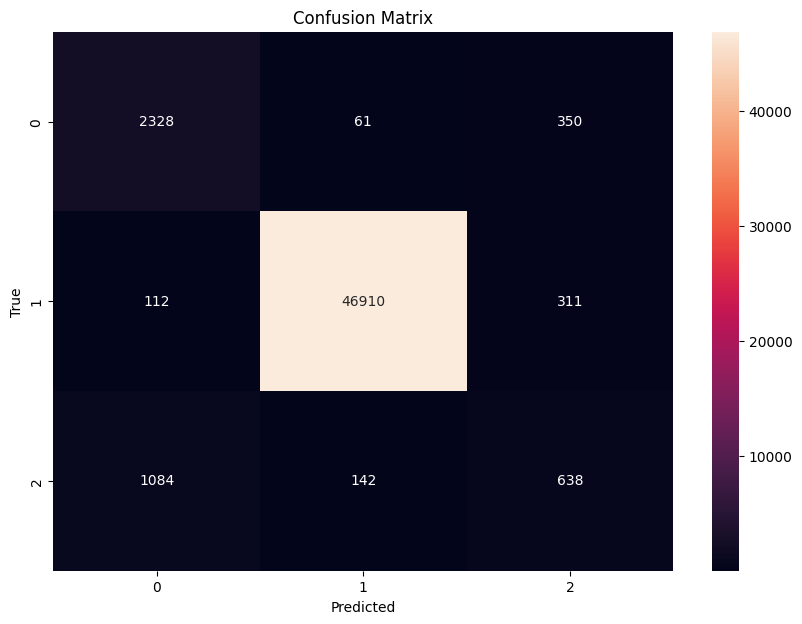

In [293]:
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(3), columns=range(3))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [294]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_macro])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 15, 15, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 64)         

In [295]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
660/660 [==============================] - 14s 17ms/step - loss: 0.1983 - f1_macro: 0.9385 - val_loss: 0.1190 - val_f1_macro: 0.9529
Epoch 2/10
660/660 [==============================] - 11s 17ms/step - loss: 0.1266 - f1_macro: 0.9508 - val_loss: 0.1129 - val_f1_macro: 0.9556
Epoch 3/10
660/660 [==============================] - 12s 18ms/step - loss: 0.1233 - f1_macro: 0.9518 - val_loss: 0.1089 - val_f1_macro: 0.9551
Epoch 4/10
660/660 [==============================] - 12s 18ms/step - loss: 0.1166 - f1_macro: 0.9530 - val_loss: 0.1093 - val_f1_macro: 0.9554
Epoch 5/10
660/660 [==============================] - 11s 17ms/step - loss: 0.1144 - f1_macro: 0.9539 - val_loss: 0.1057 - val_f1_macro: 0.9560
Epoch 6/10
660/660 [==============================] - 11s 17ms/step - loss: 0.1115 - f1_macro: 0.9535 - val_loss: 0.1052 - val_f1_macro: 0.9567
Epoch 7/10
660/660 [==============================] - 11s 17ms/step - loss: 0.1087 - f1_macro: 0.9542 - val_loss: 0.1017 - val_f1_macro:

In [296]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test f1 macro score:', score[1])

Test loss: 0.09615069627761841
Test f1 macro score: 0.9569028615951538


In [297]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)

1623/1623 [==============================] - 6s 4ms/step


In [298]:
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    true_classes = np.argmax(y_test, axis=1)
else:
    true_classes = y_test

class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.82      0.71      2739
           1       0.99      0.99      0.99     47333
           2       0.46      0.30      0.36      1864

    accuracy                           0.96     51936
   macro avg       0.69      0.70      0.69     51936
weighted avg       0.96      0.96      0.95     51936

Confusion Matrix:
 [[ 2239   127   373]
 [  180 46853   300]
 [ 1105   195   564]]


## Predictions on public X_test

In [299]:
X_test_sub = pd.read_csv('public_X_test.csv')

In [300]:
X_test_sub.head()

,Timesteps,ChassisId_encoded,gen,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,af1__10,af1__11,af1__12,af1__13,af1__14,af1__15,af1__16,af1__17,af1__18,af1__19,af1__20,af1__21,af1__22,af1__23,af1__24,af1__25,af1__26,af1__27,af1__28,af1__29,af1__30,af1__31,af2__0,af2__1,af2__2,af2__3,af2__4,af2__5,af2__6,af2__7,af2__8,af2__9,af2__10,af2__11,af2__12,af2__13,af2__14,af2__15,af2__16,af2__17,af2__18,af2__19,af2__20,af2__21,af2__22,af2__23,af2__24,af2__25,af2__26,af2__27,af2__28,f__0,f__1,f__2,f__3,f__4,f__5,f__6,f__7,f__8,f__9,f__10,f__11,f__12,f__13,f__14,f__15,f__16,f__17,f__18,f__19,f__20,f__21,f__22,f__23,f__24,f__25,f__26,f__27,f__28,f__29,f__30,f__31,f__32,f__33,f__34,f__35,f__36,f__37,f__38,f__39,f__40,f__41,f__42,f__43,f__44,f__45,f__46,f__47,f__48,f__49,f__50,f__51,f__52,f__53,f__54,f__55,f__56,f__57,f__58,f__59,f__60,f__61,f__62,f__63,f__64,f__65,f__66,f__67,f__68,f__69,f__70,f__71,f__72,f__73,f__74,f__75,f__76,f__77,f__78,f__79,f__80,f__81,f__82,f__83,f__84,f__85,f__86,f__87,f__88,f__89,f__90,f__91,f__92,f__93,f__94,f__95,f__96,f__97,f__98,f__99,f__100,f__101,f__102,f__103,f__104,f__105,f__106,f__107,f__108,f__109,f__110,f__111,f__112,f__113,f__114,f__115,f__116,f__117,f__118,f__119,f__120,f__121,f__122,f__123,f__124,f__125,f__126,f__127,f__128,f__129,f__130,f__131,f__132,f__133,f__134,f__135,f__136,f__137,f__138,f__139,f__140,f__141,f__142,f__143,f__144,f__145,f__146,f__147,f__148,f__149,f__150,f__151,f__152,f__153,f__154,f__155,f__156,f__157,f__158,f__159,f__160,f__161,f__162,f__163,f__164,f__165,f__166,f__167,f__168,f__169,f__170,f__171,f__172,f__173,f__174,f__175,f__176,f__177,f__178,f__179,f__180,f__181,f__182,f__183,f__184,f__185,f__186,f__187,f__188,f__189,f__190,f__191,f__192,f__193,f__194,f__195,f__196,f__197,f__198,f__199,f__200,f__201,f__202,f__203,f__204,f__205,f__206,f__207,f__208,f__209,f__210,f__211,f__212,f__213,f__214,f__215,f__216,f__217,f__218,f__219,f__220,f__221,f__222,f__223,f__224,f__225,f__226,f__227,f__228,f__229,f__230,f__231,f__232,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242
0,0.0,181.0,gen2,0.001572,0.000074,0.009537,2.436562e-07,0.005458,0.005413,0.003982,0.00038,0.00172,0.023986,0.00931,0.000023,0.002746,0.002184,0.000008,0.000005,0.00017,0.000004,0.000186,0.014375,0.00282,0.000039,0.015121,0.001105,0.000095,0.000031,0.004256,0.000413,2.838981e-07,0.000007,0.025051,0.000031,0.000010,0.000076,0.053295,0.000004,0.000008,0.0,0.0,0.006850,0.000754,0.0,0.0,0.026097,0.002082,0.0,0.000981,0.027465,0.016922,0.073015,0.0,0.0,0.0,0.022312,0.0,0.016247,0.010484,0.000562,0.013048,0.008702,0.018196,0.696586,0.017461,-0.251596,0.219899,-0.343341,-0.146567,0.763461,-0.002671,-0.001952,0.783044,0.968563,-0.036641,0.472499,0.234407,-0.035165,0.881563,-0.649367,0.090597,-0.210891,0.186783,-0.043947,0.272695,-0.004985,-0.017533,0.860681,1.007106,0.029749,1.032833,-0.00285,-0.333722,1.789591,-0.302822,1.243803,-0.342892,0.050748,-0.131496,-0.001968,0.04678,-0.259784,-0.002657,0.501851,0.210401,-0.163180,0.169241,0.487117,0.419522,-0.127485,-0.463628,-0.188069,-0.951256,0.040515,NaN,NaN,-1.085021,-1.20586,-0.351128,-0.860013,-1.198362,-0.198187,-0.003105,-0.282104,-0.639214,-0.272174,-0.216821,-0.276399,-0.014843,-0.041639,-0.768098,-1.127920,-0.762378,-0.935367,-0.387459,-0.266959,-1.240008,-0.015547,-0.057522,-0.877962,-0.376339,-0.027416,-0.002617,-0.965523,-0.121527,-0.132284,-0.009507,-0.022475,-0.135364,0.016393,-0.000401,0.003088,0.000011,0.017857,0.000074,-0.004300,-0.000365,0.019215,-0.000174,0.010693,-0.000403,0.027624,-1.208026,-0.004631,0.000815,-0.064295,0.169751,0.168924,-0.046986,0.516824,-0.119913,-0.020638,-0.603047,0.442708,-0.43295,-0.331414,0.017483,-0.291126,-0.319922,0.142206,-0.009328,-0.40144,NaN,-0.433991,0.738914,0.177782,NaN,-0.017685,0.5701,-0.056976,0.179206,-0.479033,0.181914,0.513875,-0.014065,0.252181,-0.008909,-0.034257,-0.170452,-0.111639,0.070881,-0.126841,1.772493,0.215906,-0.239322,1.395228,-0.413971,-0.445385,-0.742053,0.58570

In [301]:
rul_test = pd.DataFrame(X_test_sub.groupby('ChassisId_encoded')['Timesteps'].max()).reset_index()
rul_test.columns = ['ChassisId_encoded', 'max']
X_test_sub = X_test_sub.merge(rul, on=['ChassisId_encoded'], how='left')
X_test_sub['RUL'] = X_test_sub['max'] - X_test_sub['Timesteps']

In [309]:
remove_cols = X_test_sub.columns.difference(['Timesteps','ChassisId_encoded', 'max', 'gen', 'af2__5', 'af2__6', 'af2__13', 'af2__19', 'af2__20', 'af2__22', 'af2__18', 'af2__9', 'af1__28', 'f__51','f__52','f__65','f__117','f__119','f__123','f__133'])
len(remove_cols)

289

In [310]:
df_train_columns = set(df_train.columns)
remove_cols_set = set(remove_cols)

df_train_columns - remove_cols_set

{'ChassisId_encoded',
 'Timesteps',
 'risk_level_High',
 'risk_level_Low',
 'risk_level_Medium'}

In [311]:
X_test_sub = X_test_sub[remove_cols]

In [312]:
input_shape = (17, 17, 1) 
X_test_sub = X_test_sub.values.reshape(-1, *input_shape)

In [313]:
X_test_sub.shape

(33590, 17, 17, 1)

In [316]:
x_test_predicted_classes = np.argmax(model.predict(X_test_sub), axis=1)

1050/1050 [==============================] - 4s 4ms/step


In [325]:
predictions = pd.DataFrame()
predictions['pred'] = x_test_predicted_classes

In [326]:
predictions['pred'] = predictions['pred'].replace({0: 'High', 1: 'Low', 2: 'Medium'})

print(predictions['pred'].value_counts())

Low       33541
Medium       44
High          5
Name: pred, dtype: int64


In [327]:
predictions.to_csv('prediction.csv',index=False)